# Data Description

You are a data scientist of a big MNC who usually hires more than 10k candidates every year.
To complete the task they conduct more than 1 lakhs of interviews every year.

Interview-Intel is the modern way to approach hiring by harmonizing all aspects of the interview process into a beautiful symphony.
An interview intelligence tool records, transcribes, and analyzes candidate conversations.
It helps the hiring managers, recruiters, and HR Business Partners (HRBPs) to gain deeper visibility into the interview process,
create smooth feedback loops between the panellists, and improve the overall recruitment process.

You need to predict the status of the interviews so that recruiters can check the sanity of the interview and find if the interview was biased


detailed description:

Interview Id : Id for the interview

Candidate Id : Id for the candidate

Interviewer Id : Id for the interviewer

Profile : Profile type

S.L.R.C (Speak to Listen Ratio Candidate): It is the ratio of speaking time to the listening time of the Candidate.

S.L.R.I (Speak to Listen Ratio Interviewer): It is the ratio of speaking time to the listening time of the Interviewer.

A.T.T Avg Turn Time (Interactivity Time): It is the average amount of time in which single interaction happens between the Interviewer and the Candidate.

L.M.I (Longest Monologue Interviewer): It is the longest amount of time that the interviewer spoke continuously.

L.M.C (Longest Monologue Candidate): It is the longest amount of time that the candidate spoke continuously.

S.R (SILENCE RATIO):It is the percentage of time when no one had spoken

L.J.T.C (Late Joining Time Candidate): It is the amount of time a candidate joined late for the interview call.

L.J.T.I (Late Joining Time Interviewer): It is the amount of time the interviewer joined late for the interview call.

N.I.C(Noise Index Candidate): Percentage of Background Noise present on the candidate side.

N.I.I(Noise Index Interviewer): Percentage of Background Noise present on the interviewer’s side.

S.P.I - Speaking Pace interviewer: Average Number of words spoken per minute.

S.P.C - Speaking Pace Candidate: Average Number of words spoken per minute.

L.A.I - Live Absence interviewer: It is the percentage of time the interviewer was not present in the video call.

L.A.C - Live Absence candidate: It is the percentage of time the candidate was not present in the video call.

Q.A - Question asked during the interview

P.E.I - Perceived Emotion Interviewer: It is the perceived emotion of Interviewer which can be either Positive or Negative

P.E.C - Perceived Emotion Candidate: It is the perceived emotion of candidate which can be either Positive or Negative

Compliance ratio - Does the interviewer follow the structure that has been guided by the company. It is the ratio of questions assigned to the number of questions which were actually asked.

Interview Duration : For how much time interview happened

Interview Intro :Does interviewer give the self-introduction to the candidate or not

Candidate Intro :Does candidate give the self-introduction to the interviewer or not

Opp to ask : Does the interviewer give a chance to the candidate to ask questions at the end.

Status : Status of the candidate.


# 1. Importing the Necessary Libraries

In [1]:
import pandas as pd                                # To perform data manipulation
import numpy as np                                 # To perform some numerical operations
import seaborn as sns                              # For visualization
import matplotlib.pyplot as plt                    # For Visualization
from warnings import filterwarnings                # To remove warnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)          # To display all the columns

# 2. Data preprocessing

## 1.Data Collection:

In [2]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_data=pd.read_csv(r"/content/drive/MyDrive/Hackthon Level2/train_IA_-_train.csv")
test_data=pd.read_csv(r"/content/drive/MyDrive/Hackthon Level2/test_IA_-_test.csv")

## Train data

In [4]:
train_data.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,6.913030e+11,2.655774e+09,194,Developer,0.98,0.02,53,88,93,32,88,106,41,66,42,47,13,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
1,9.214326e+11,7.123846e+08,234,Sales,0.67,0.33,51,53,44,36,93,313,28,62,32,52,5,15,4,Neutral,Negative,54,33,No,No,Yes,Consider
2,4.718839e+10,8.445533e+08,267,Program Manager,0.81,0.19,60,77,75,54,52,67,26,14,57,34,4,7,3,Positive,Positive,31,58,No,Yes,No,Consider
3,9.943741e+11,6.511106e+09,199,Marketing,0.69,0.31,93,42,103,49,115,166,62,55,65,75,10,10,7,Positive,Negative,24,35,No,Yes,No,Consider
4,3.509007e+11,3.487001e+09,221,QA Automation,0.57,0.43,44,44,119,66,190,394,7,32,36,74,13,7,3,Negative,Positive,73,60,Yes,Yes,No,Consider


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        5800 non-null   float64
 1   Candidate Id        5800 non-null   float64
 2   Interviewer Id      5800 non-null   int64  
 3   Profile             5800 non-null   object 
 4   S.L.R.C             5800 non-null   float64
 5   S.L.R.I             5800 non-null   float64
 6   A.T.T               5800 non-null   int64  
 7   L.M.I               5800 non-null   int64  
 8   L.M.C               5800 non-null   int64  
 9   S.R                 5800 non-null   int64  
 10  L.J.T.C             5800 non-null   int64  
 11  L.J.T.I             5800 non-null   int64  
 12  N.I.C               5800 non-null   int64  
 13  N.I.I               5800 non-null   int64  
 14  S.P.I               5800 non-null   int64  
 15  S.P.C               5800 non-null   int64  
 16  L.A.C 

**You have a train data with 20 categorical features and 7 numeric feature.**

## Test data

In [ ]:
test_data.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,...,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,702127796635,2.381365e+09,229,Product Manager,0.52,0.48,103,53,77,30,...,5,19.0,4.0,Positive,Negative,24.0,49,Yes,Yes,Yes
1,613490569071,8.428514e+08,194,Product Manager,0.87,0.13,54,57,57,68,...,1,9.0,7.0,Positive,Neutral,99.0,24,No,Yes,Yes
2,759998772623,7.681665e+09,266,QA Automation,0.60,0.40,50,117,93,36,...,7,15.0,3.0,Negative,Positive,16.0,16,Yes,No,Yes
3,391760082113,6.627808e+09,256,HR,0.52,0.48,102,114,66,31,...,10,4.0,6.0,Negative,Neutral,66.0,40,No,No,Yes
4,941599210196,1.148634e+09,267,HR,0.59,0.41,96,73,115,23,...,10,4.0,6.0,Positive,Positive,47.0,38,No,Yes,Yes


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        1200 non-null   int64  
 1   Candidate Id        1200 non-null   float64
 2   Interviewer Id      1200 non-null   int64  
 3   Profile             1200 non-null   object 
 4   S.L.R.C             1200 non-null   float64
 5   S.L.R.I             1199 non-null   float64
 6   A.T.T               1200 non-null   int64  
 7   L.M.I               1200 non-null   int64  
 8   L.M.C               1200 non-null   int64  
 9   S.R                 1200 non-null   int64  
 10  L.J.T.C             1199 non-null   float64
 11  L.J.T.I             1200 non-null   int64  
 12  N.I.C               1200 non-null   int64  
 13  N.I.I               1200 non-null   int64  
 14  S.P.I               1198 non-null   float64
 15  S.P.C               1200 non-null   int64  
 16  L.A.C 

## 3.Data Cleaning:
Remove duplicates, if any. Correct inconsistent or erroneous data. Handle outliers if necessary.

In [ ]:
train_data.duplicated().sum()

0

**my train data does not contain any duplicate values.**

# 4.Handling Missing Data:
Remove or fill missing values using techniques like mean, median, or mode imputation. Use domain knowledge to decide on the best approach for handling missing data.

In [ ]:
train_data.isna().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 1
P.E.C                 3
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     1
Candidate into        0
Opp to ask            1
Status                4
dtype: int64

<Axes: >

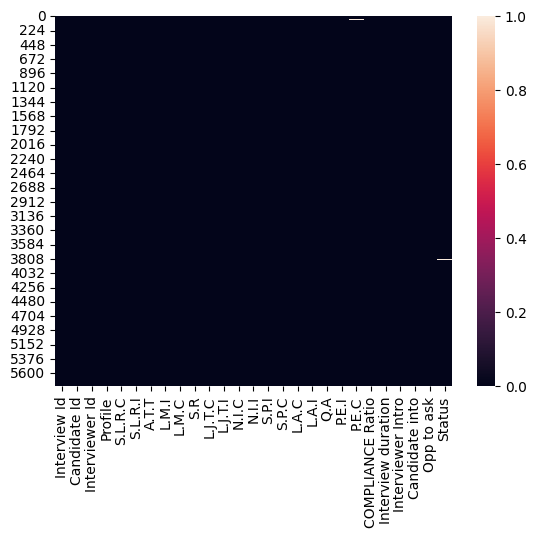

In [ ]:
sns.heatmap(train_data.isnull())

In [ ]:
train_data['P.E.I'].isna().sum() # my column contain 1 null value.

1

In [ ]:
train_data[(train_data['P.E.I'].isna())]

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
3818,1.146755e+10,2.718623e+09,209,Data Scientist,0.94,0.06,48,52,83,52,75,425,24,39,72,75,1,6,3,NaN,Positive,22,29,Yes,No,No,Consider


## imputing
Filling null values in a dataset is often referred to as "imputing" missing data. Imputing involves replacing or filling in missing values with estimated or calculated values, typically based on the available data and specific imputation techniques.

In [ ]:
train_data['P.E.I'].mode()[0]

'Negative'

In [ ]:
train_data['P.E.I'].fillna('Negative', inplace=True)

In [ ]:
train_data.isna().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 0
P.E.C                 3
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     1
Candidate into        0
Opp to ask            1
Status                4
dtype: int64

In [ ]:
train_data[(train_data['P.E.C'].isna())]

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
16,3.368508e+11,1.563671e+09,257,Marketing,0.97,0.03,80,59,57,55,126,271,28,34,76,34,2,9,7,Neutral,NaN,47,48,No,No,Yes,May Consider
50,5.082697e+11,8.410668e+09,198,Sales,0.85,0.15,40,81,92,42,45,236,27,66,68,34,6,6,6,Negative,NaN,60,55,Yes,Yes,No,Consider
1993,8.815277e+11,7.927168e+08,268,Product Manager,0.72,0.28,92,42,58,41,88,286,60,69,39,21,13,19,3,Positive,NaN,21,57,Yes,No,Yes,May Consider


In [ ]:
train_data['P.E.C'].mode()[0]

'Neutral'

In [ ]:
train_data['P.E.C'].fillna('Neutral', inplace=True)

In [ ]:
train_data.isna().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 0
P.E.C                 0
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     1
Candidate into        0
Opp to ask            1
Status                4
dtype: int64

In [ ]:
train_data[(train_data['Interviewer Intro'].isna())]

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
361,8.562141e+11,6.416991e+09,203,Account Manager,0.77,0.23,23,104,54,43,90,317,66,28,61,51,14,5,7,Positive,Positive,71,25,NaN,Yes,No,May Consider


In [ ]:
train_data['Interviewer Intro'].mode()[0]

'No'

In [ ]:
train_data['Interviewer Intro'].fillna('No', inplace=True)

In [ ]:
train_data.isna().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 0
P.E.C                 0
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     0
Candidate into        0
Opp to ask            1
Status                4
dtype: int64

In [ ]:
train_data[(train_data['Opp to ask'].isna())]

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
3811,4.162351e+11,7.954138e+09,222,Data Scientist,0.58,0.42,56,86,66,41,123,599,42,12,38,22,12,15,5,Negative,Neutral,36,46,Yes,Yes,NaN,May Consider


In [ ]:
train_data['Opp to ask'].mode()[0]

'Yes'

In [ ]:
train_data['Opp to ask'].fillna('Yes', inplace=True)

In [ ]:
train_data.isna().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 0
P.E.C                 0
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     0
Candidate into        0
Opp to ask            0
Status                4
dtype: int64

In [ ]:
train_data[(train_data['Status'].isna())]

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
349,6.099996e+11,2.295937e+09,237,QA Automation,0.83,0.17,37,93,102,28,30,393,49,23,58,49,13,9,4,Neutral,Positive,75,23,No,No,No,NaN
3807,4.068795e+10,3.910784e+09,209,QA Manual,0.98,0.02,112,99,98,65,267,499,33,62,24,53,15,18,3,Negative,Positive,27,19,No,Yes,No,NaN
3816,6.587907e+11,6.044150e+09,260,Account Manager,0.57,0.43,47,100,83,31,172,424,34,55,41,40,4,15,5,Negative,Neutral,0,42,No,Yes,No,NaN
5795,3.186849e+11,7.483571e+09,192,Marketing,0.58,0.42,52,51,119,42,274,100,13,15,59,6,6,13,5,Negative,Neutral,16,25,Yes,Yes,No,NaN


In [ ]:
train_data['Status'].mode()[0]

'Consider'

In [ ]:
train_data['Status'].fillna('Consider', inplace=True)

In [ ]:
train_data.isna().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 0
P.E.C                 0
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     0
Candidate into        0
Opp to ask            0
Status                0
dtype: int64

**I have successfully removed all null values from my train data through the cleaning process.**

# 5.data analysis

In [ ]:
train_data.columns

Index(['Interview Id', 'Candidate Id', 'Interviewer Id', 'Profile', 'S.L.R.C',
       'S.L.R.I', 'A.T.T', 'L.M.I', 'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I',
       'N.I.C', 'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'P.E.I',
       'P.E.C', 'COMPLIANCE Ratio', 'Interview duration', 'Interviewer Intro',
       'Candidate into', 'Opp to ask', 'Status'],
      dtype='object')

In [ ]:
train_data['Interview Id'].value_counts()

6.913030e+11    1
2.366589e+10    1
3.249524e+10    1
8.382473e+11    1
6.524176e+11    1
               ..
9.360567e+11    1
8.455346e+11    1
6.133017e+11    1
3.587956e+10    1
8.630407e+11    1
Name: Interview Id, Length: 5800, dtype: int64

In [ ]:
train_data['Candidate Id'].value_counts()

2.655774e+09    1
8.268175e+09    1
3.114702e+09    1
5.961717e+09    1
4.145344e+09    1
               ..
8.414256e+08    1
1.251554e+09    1
4.215287e+09    1
5.796895e+09    1
3.494633e+09    1
Name: Candidate Id, Length: 5800, dtype: int64

In [ ]:
train_data['Interviewer Id'].value_counts()

218    95
216    92
241    90
264    89
215    88
       ..
261    59
235    58
202    58
200    57
204    53
Name: Interviewer Id, Length: 79, dtype: int64

**These two columns are completely unique and there is no information to get.**

In [ ]:
train_data.drop(['Candidate Id','Interview Id','Interviewer Id'],axis=1,inplace=True)

In [ ]:
train_data.columns

Index(['Profile', 'S.L.R.C', 'S.L.R.I', 'A.T.T', 'L.M.I', 'L.M.C', 'S.R',
       'L.J.T.C', 'L.J.T.I', 'N.I.C', 'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C',
       'L.A.I', 'Q.A', 'P.E.I', 'P.E.C', 'COMPLIANCE Ratio',
       'Interview duration', 'Interviewer Intro', 'Candidate into',
       'Opp to ask', 'Status'],
      dtype='object')

In [ ]:
train_data['A.T.T'].value_counts()

39     76
35     75
32     72
104    70
61     69
       ..
67     42
38     42
63     41
42     40
107    40
Name: A.T.T, Length: 101, dtype: int64

In [ ]:
train_data['L.M.I'].value_counts()

88     100
105     95
59      93
110     87
84      85
      ... 
65      55
66      55
80      55
62      54
53      50
Name: L.M.I, Length: 81, dtype: int64

In [ ]:
train_data['L.J.T.C'].value_counts()

125    32
277    31
295    31
193    31
55     30
       ..
116    10
288    10
157     9
22      9
175     9
Name: L.J.T.C, Length: 301, dtype: int64

In [ ]:
train_data['L.J.T.I'].value_counts()

562    21
211    21
582    19
379    18
276    18
       ..
565     3
540     3
326     3
209     2
389     2
Name: L.J.T.I, Length: 601, dtype: int64

In [ ]:
train_data['N.I.C'].value_counts()

63    109
23    104
52    103
62    103
19    101
     ... 
36     74
6      74
57     72
11     71
9      71
Name: N.I.C, Length: 66, dtype: int64

In [ ]:
train_data['N.I.I'].value_counts()

17    106
8     106
68    105
51    105
69    104
     ... 
5      73
66     73
70     69
56     69
26     68
Name: N.I.I, Length: 66, dtype: int64

In [ ]:
train_data['S.P.I'].value_counts()

72    102
46    101
87     99
48     97
56     97
     ... 
59     70
21     69
36     67
50     64
80     57
Name: S.P.I, Length: 71, dtype: int64

In [ ]:
train_data['S.P.C'].value_counts()

34    90
6     87
50    82
40    81
36    81
      ..
66    55
88    53
62    52
51    51
18    47
Name: S.P.C, Length: 86, dtype: int64

In [ ]:
train_data['L.A.C'].value_counts()

11    408
4     407
15    401
5     398
7     396
6     392
13    389
2     389
10    381
9     380
12    376
8     375
14    374
1     373
3     361
Name: L.A.C, dtype: int64

In [ ]:
train_data['Q.A'].value_counts()

6    997
5    997
4    971
3    968
2    936
7    931
Name: Q.A, dtype: int64

In [ ]:
train_data['P.E.I'].value_counts()

Negative    2005
Neutral     1900
Positive    1895
Name: P.E.I, dtype: int64

In [ ]:
train_data['P.E.C'].value_counts()

Neutral     1974
Positive    1941
Negative    1885
Name: P.E.C, dtype: int64

In [ ]:
train_data['COMPLIANCE Ratio'].value_counts()

11    77
51    75
87    75
56    75
17    74
      ..
97    46
58    46
45    44
29    42
73    42
Name: COMPLIANCE Ratio, Length: 101, dtype: int64

In [ ]:
train_data['Interviewer Intro'].value_counts()

No     2912
Yes    2888
Name: Interviewer Intro, dtype: int64

In [ ]:
train_data['Candidate into'].value_counts()

No     2936
Yes    2864
Name: Candidate into, dtype: int64

In [ ]:
train_data['Opp to ask'].value_counts()

Yes    2956
No     2844
Name: Opp to ask, dtype: int64

In [ ]:
train_data['Status'].value_counts()

Consider        2315
May Consider    1890
Not Consider    1595
Name: Status, dtype: int64

## 6.Data Visualization:

In [ ]:
train_data.head()

,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,Developer,0.98,0.02,53,88,93,32,88,106,41,66,42,47,13,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
1,Sales,0.67,0.33,51,53,44,36,93,313,28,62,32,52,5,15,4,Neutral,Negative,54,33,No,No,Yes,Consider
2,Program Manager,0.81,0.19,60,77,75,54,52,67,26,14,57,34,4,7,3,Positive,Positive,31,58,No,Yes,No,Consider
3,Marketing,0.69,0.31,93,42,103,49,115,166,62,55,65,75,10,10,7,Positive,Negative,24,35,No,Yes,No,Consider
4,QA Automation,0.57,0.43,44,44,119,66,190,394,7,32,36,74,13,7,3,Negative,Positive,73,60,Yes,Yes,No,Consider


## Now will Seprate all Numerical and categorical data

# Train Data

In [ ]:
num_train_data=train_data.select_dtypes(exclude='object')
num_train_data.head(3)

,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration
0,0.98,0.02,53,88,93,32,88,106,41,66,42,47,13,15,6,98,37
1,0.67,0.33,51,53,44,36,93,313,28,62,32,52,5,15,4,54,33
2,0.81,0.19,60,77,75,54,52,67,26,14,57,34,4,7,3,31,58


In [ ]:
cat_train_data=train_data.select_dtypes(include='object')
cat_train_data.head(3)

,Profile,P.E.I,P.E.C,Interviewer Intro,Candidate into,Opp to ask,Status
0,Developer,Neutral,Neutral,No,Yes,Yes,Consider
1,Sales,Neutral,Negative,No,No,Yes,Consider
2,Program Manager,Positive,Positive,No,Yes,No,Consider


## Now Lets Do some Visualization and get some insights from the data

S.L.R.C


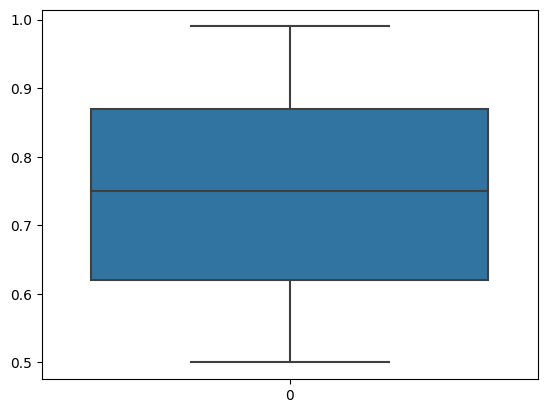

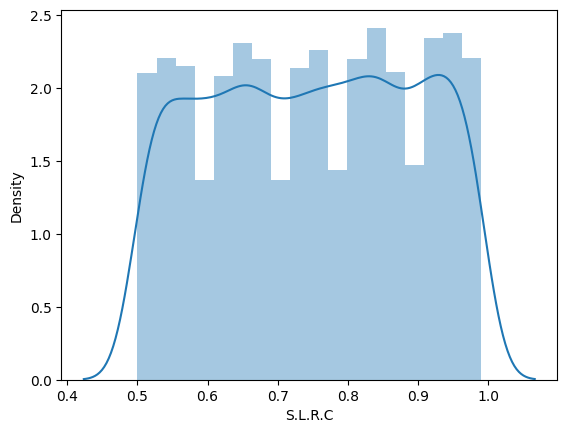

S.L.R.I


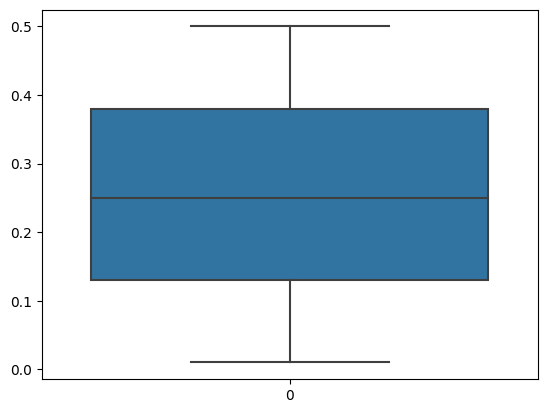

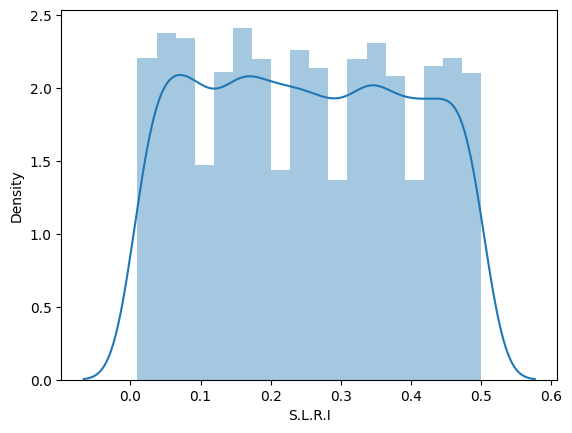

A.T.T


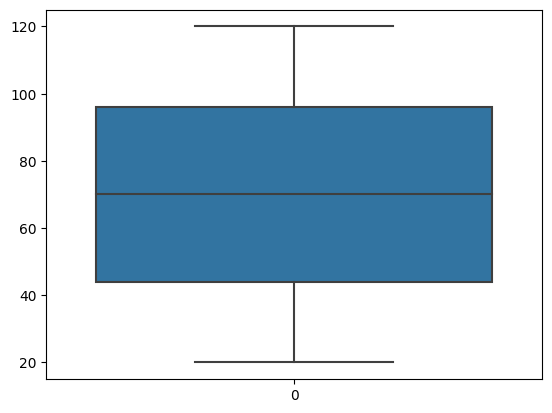

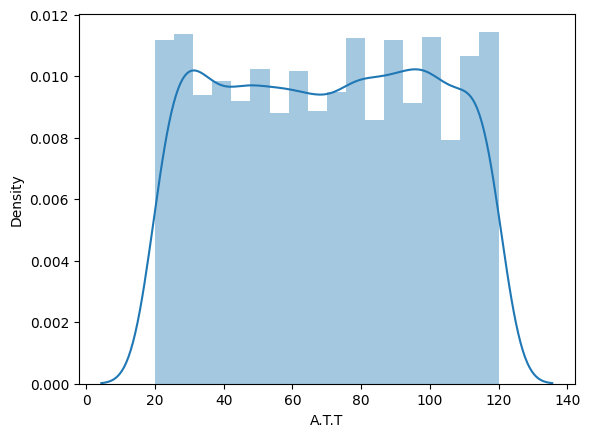

L.M.I


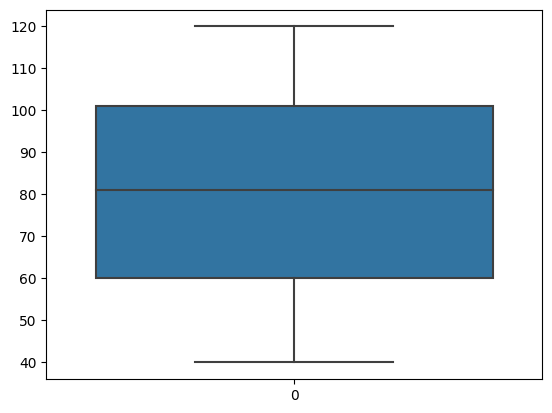

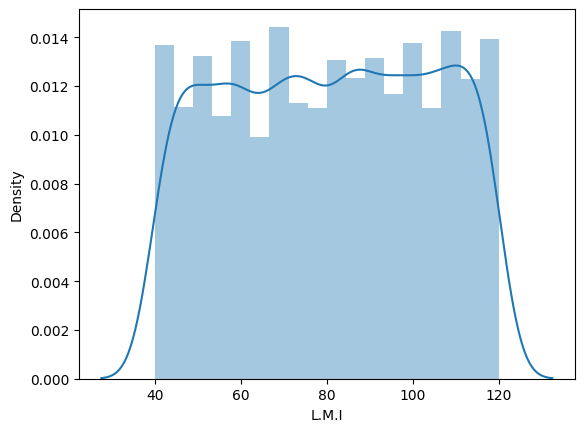

L.M.C


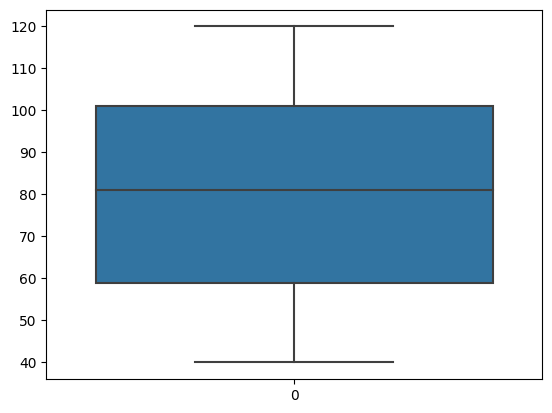

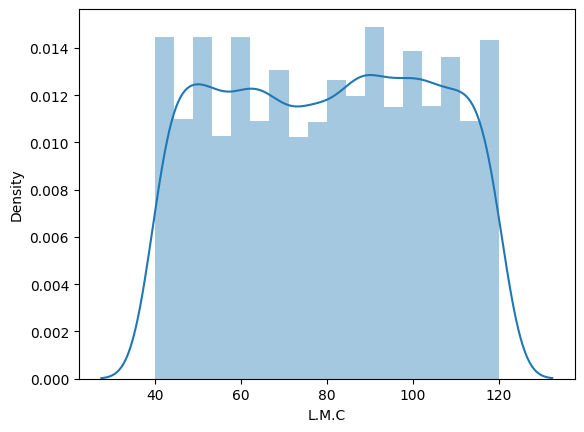

S.R


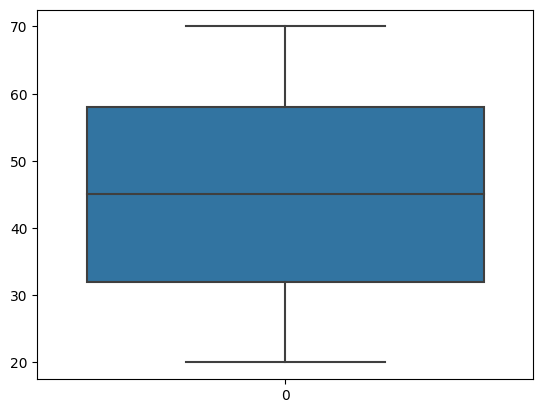

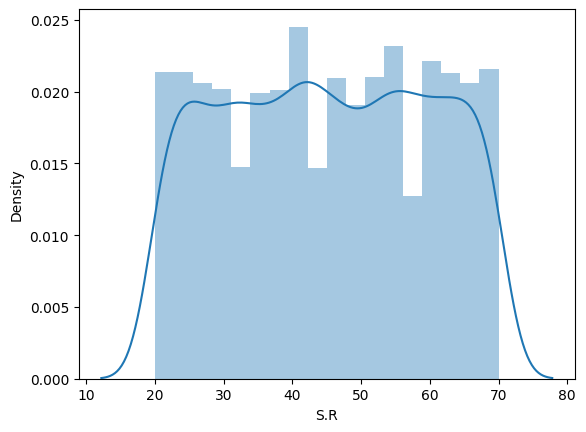

L.J.T.C


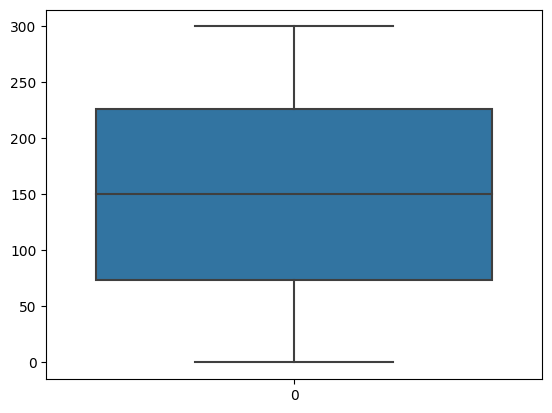

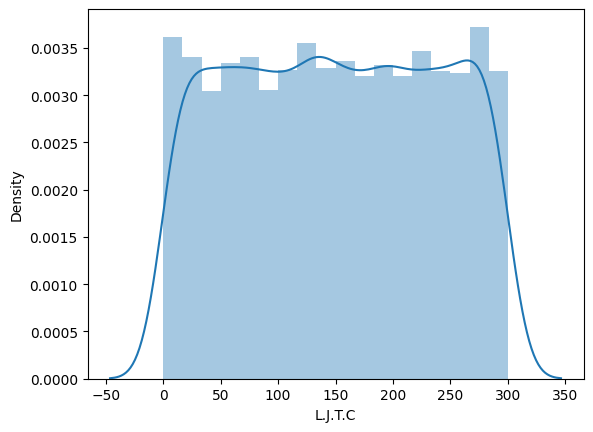

L.J.T.I


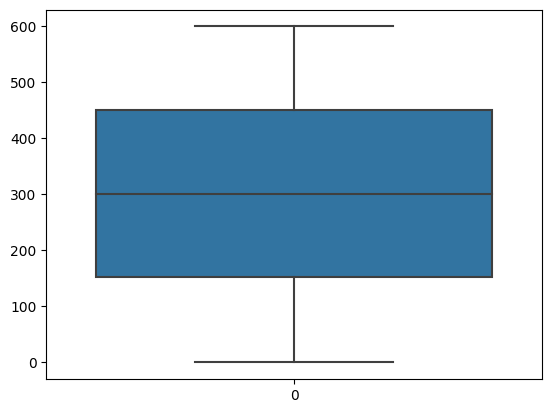

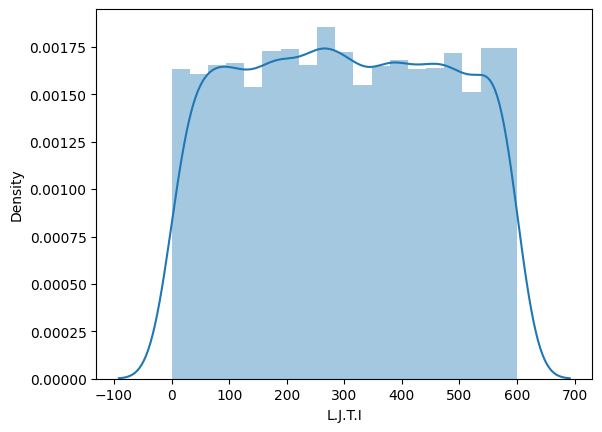

N.I.C


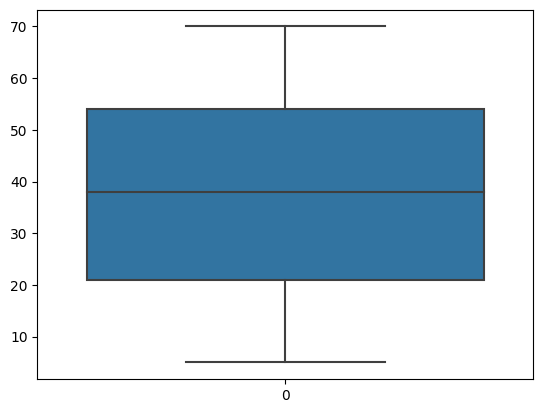

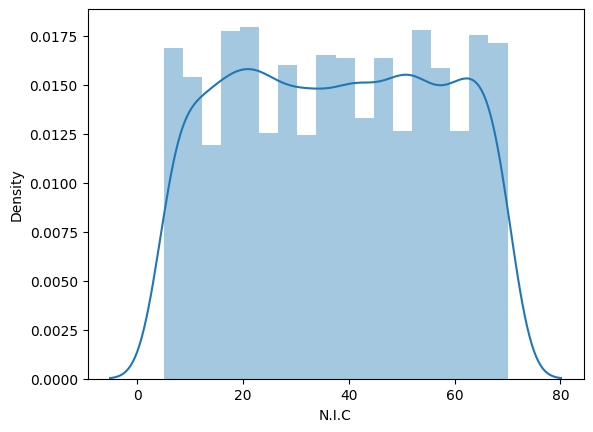

N.I.I


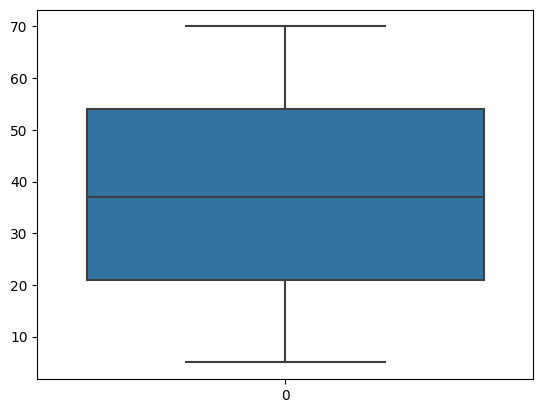

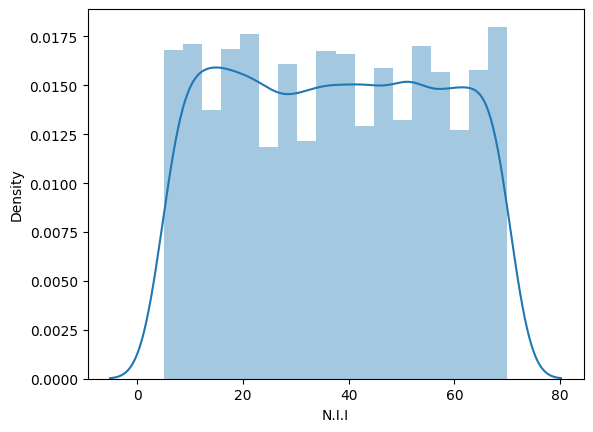

S.P.I


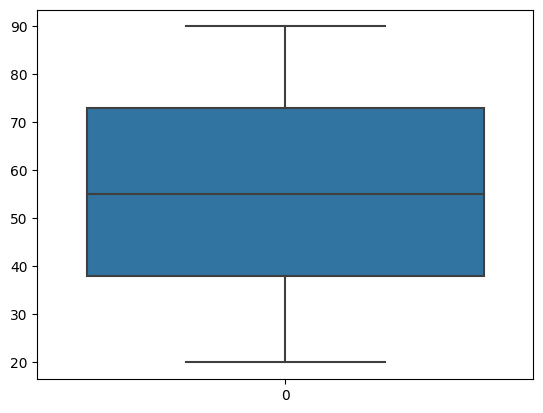

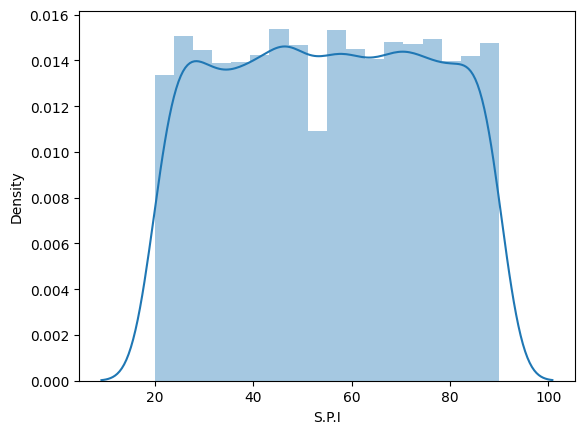

S.P.C


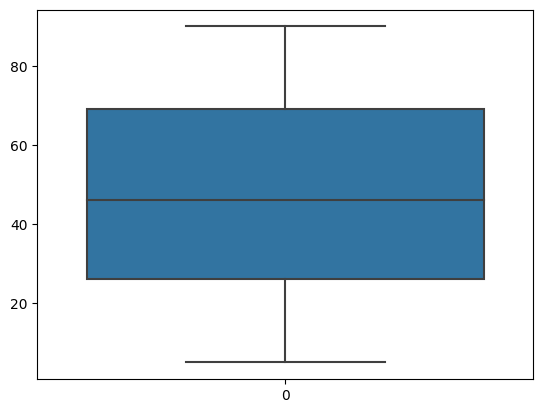

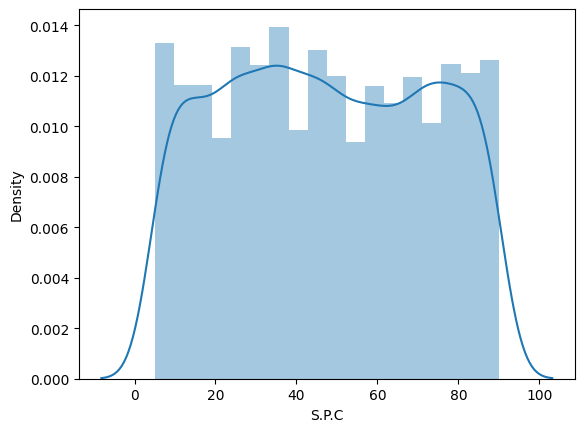

L.A.C


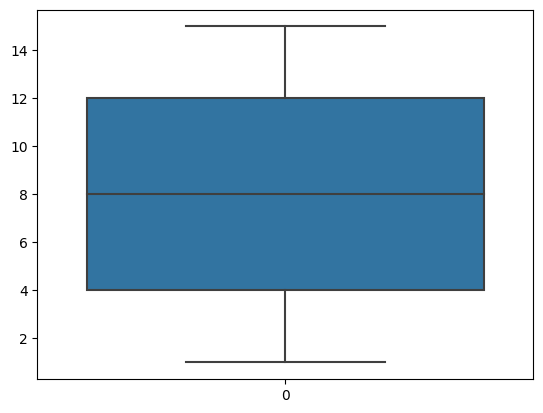

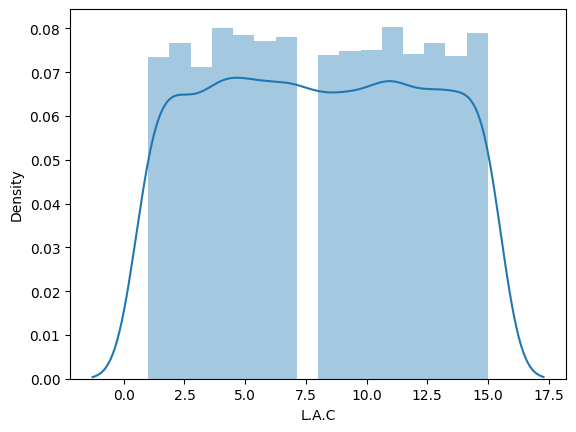

L.A.I


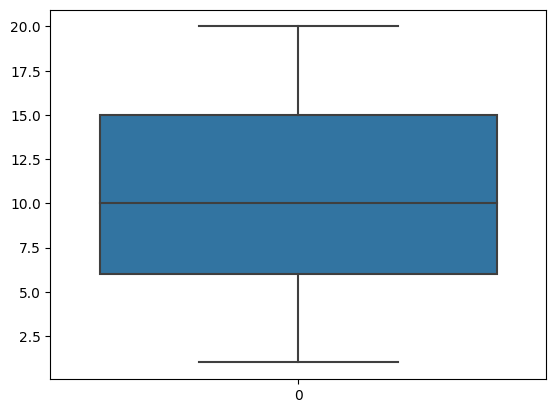

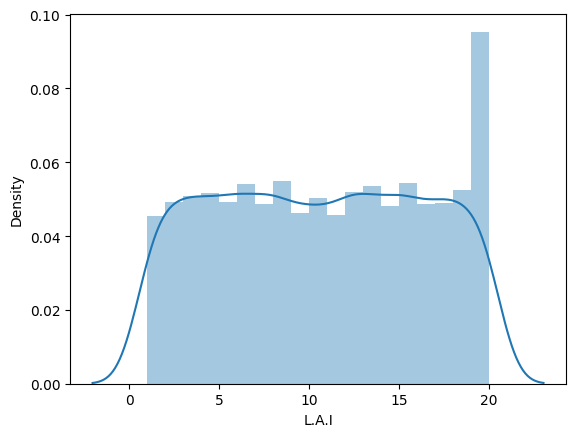

Q.A


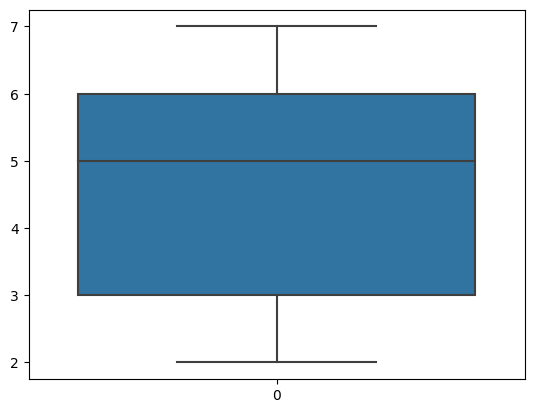

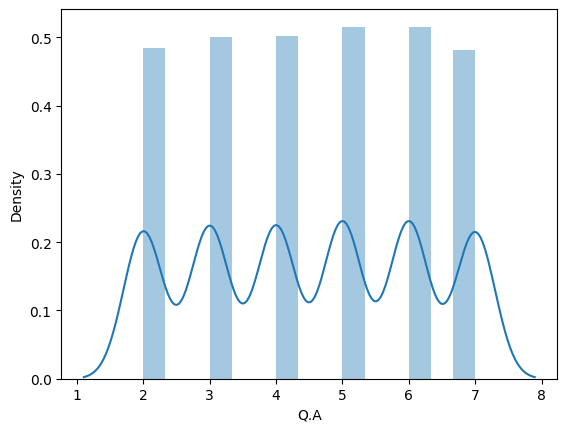

COMPLIANCE Ratio


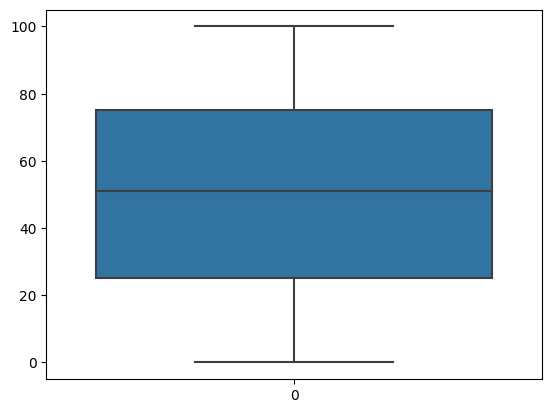

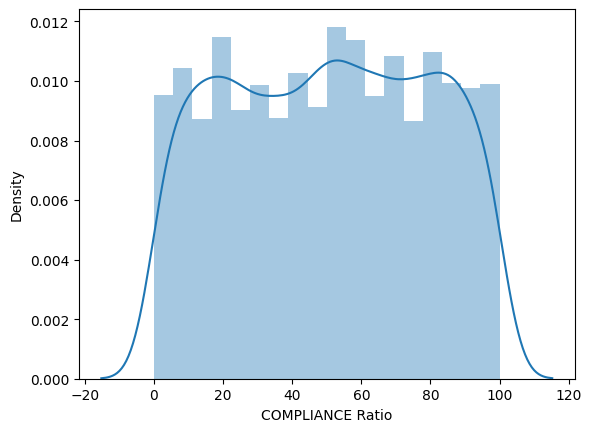

Interview duration


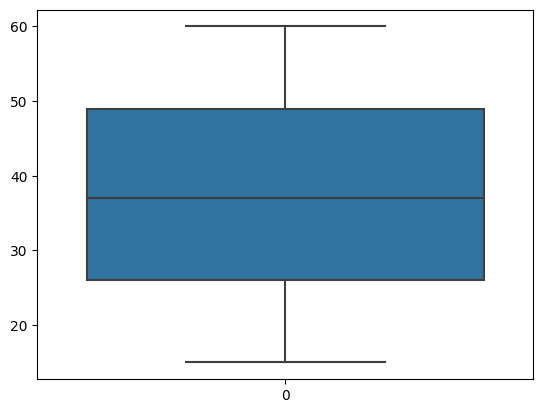

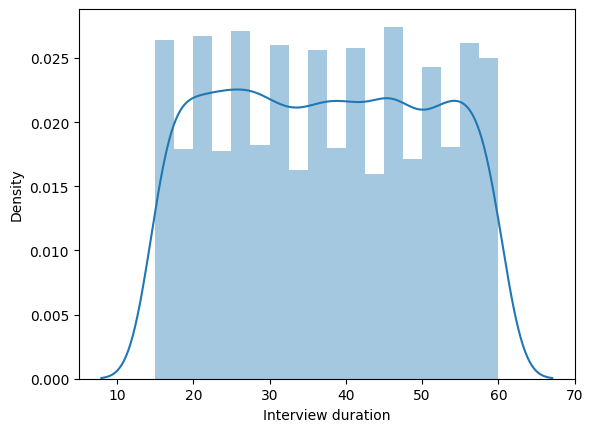

In [ ]:
for i in num_train_data:
    print(i)
    sns.boxplot(train_data[i])
    plt.show()
    sns.distplot(train_data[i])
    plt.show()

#### A single Interviewer has taken many of the interview and the status has same number of propotion details

### Will check for categorical data

Profile
['Developer' 'Sales' 'Program Manager' 'Marketing' 'QA Automation'
 'Account Manager' 'Data Scientist' 'Product Manager' 'QA Manual' 'HR']
Number of unique values = 10


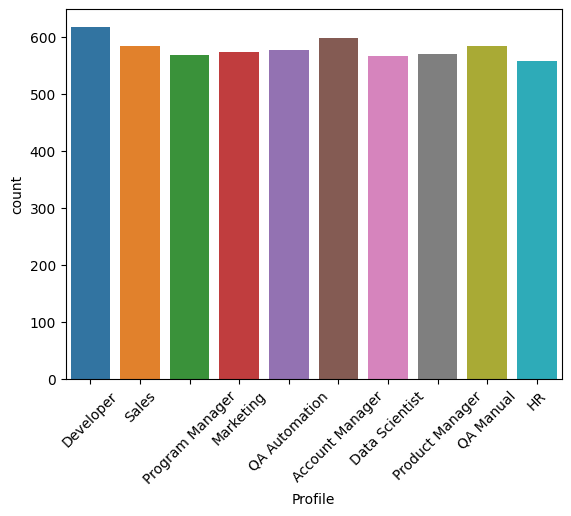

P.E.I
['Neutral' 'Positive' 'Negative']
Number of unique values = 3


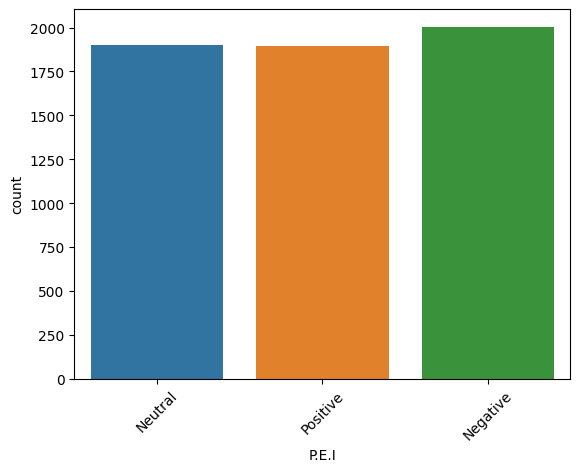

P.E.C
['Neutral' 'Negative' 'Positive']
Number of unique values = 3


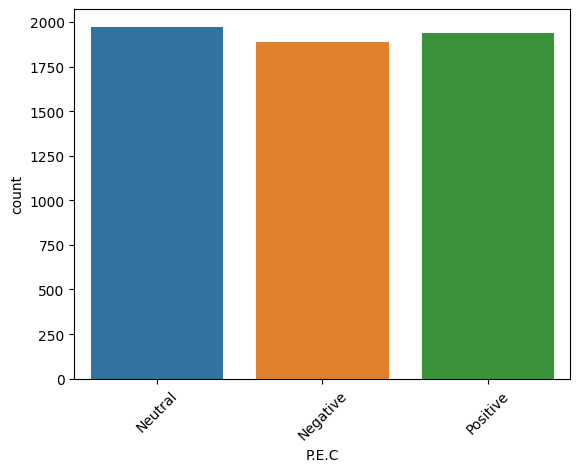

Interviewer Intro
['No' 'Yes']
Number of unique values = 2


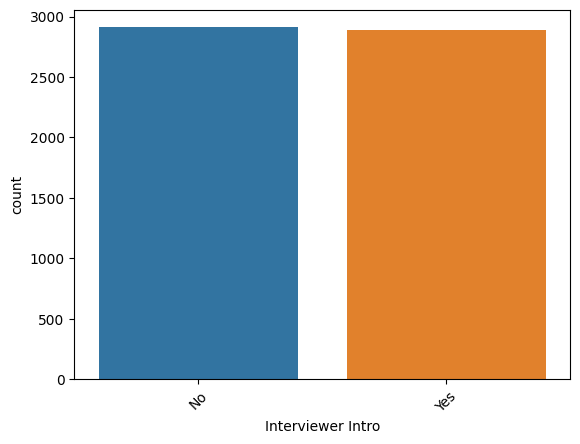

Candidate into
['Yes' 'No']
Number of unique values = 2


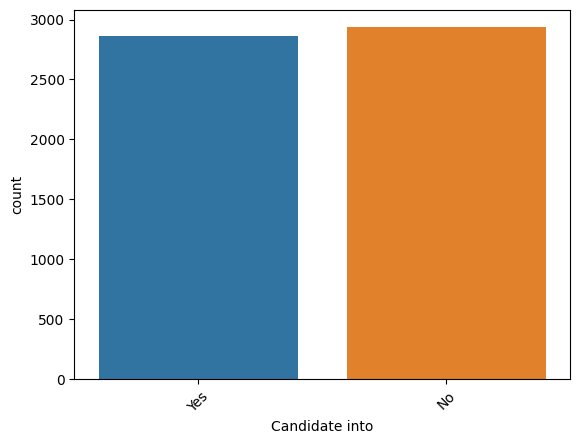

Opp to ask
['Yes' 'No']
Number of unique values = 2


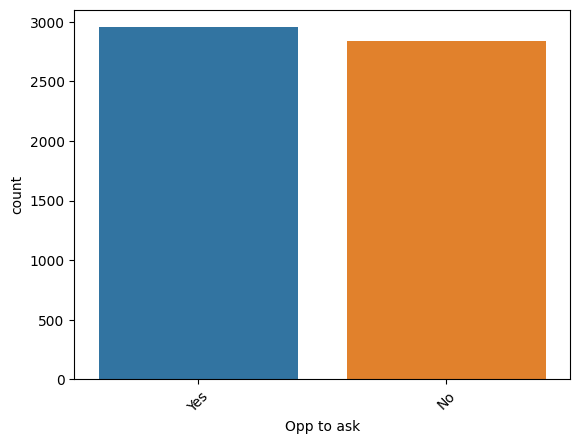

Status
['Consider' 'May Consider' 'Not Consider']
Number of unique values = 3


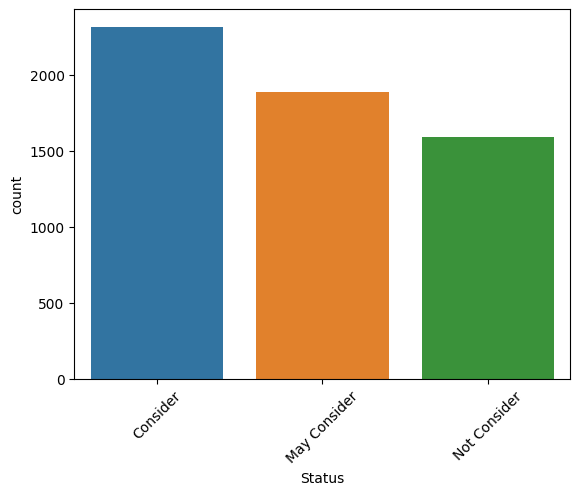

In [ ]:
for i in cat_train_data:
    print(i)
    print(train_data[i].unique())
    print('Number of unique values =', train_data[i].nunique())
    sns.countplot(data=train_data, x=i)  # Specify 'x' as the categorical variable.
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed.
    plt.show()


Profile
['Developer' 'Sales' 'Program Manager' 'Marketing' 'QA Automation'
 'Account Manager' 'Data Scientist' 'Product Manager' 'QA Manual' 'HR']
Number of unique values = 10


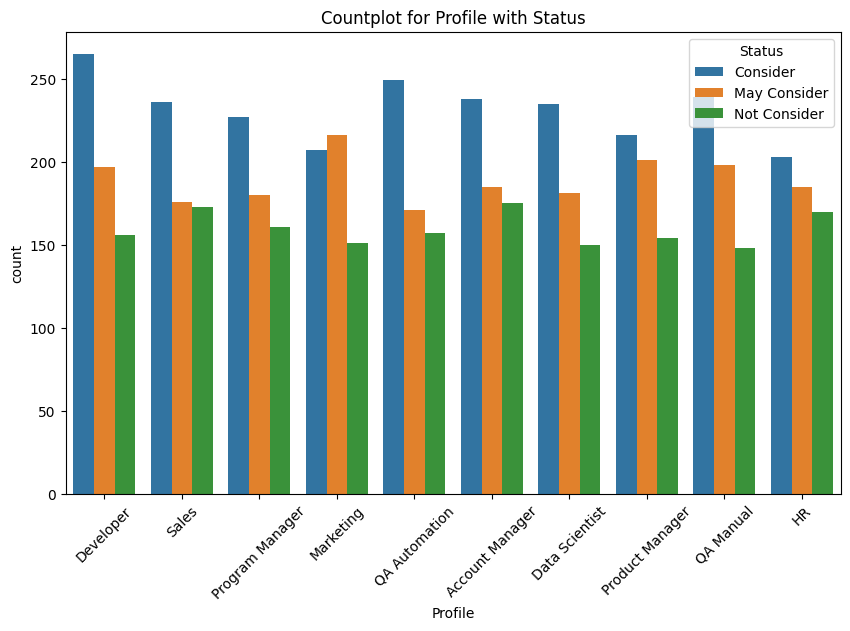

P.E.I
['Neutral' 'Positive' 'Negative']
Number of unique values = 3


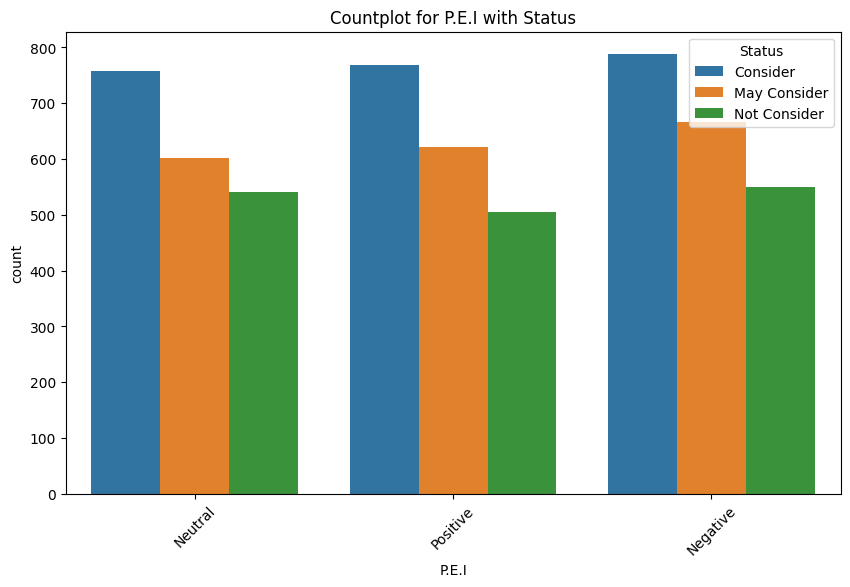

P.E.C
['Neutral' 'Negative' 'Positive']
Number of unique values = 3


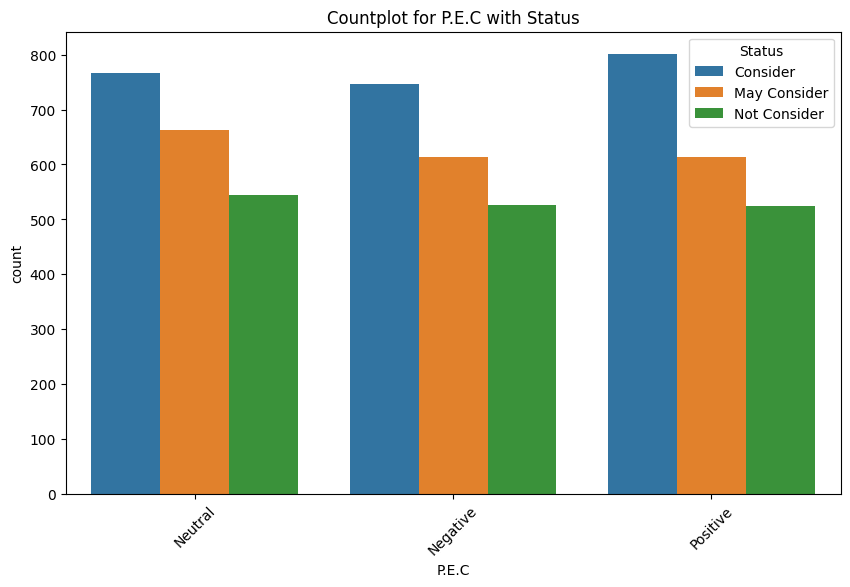

Interviewer Intro
['No' 'Yes']
Number of unique values = 2


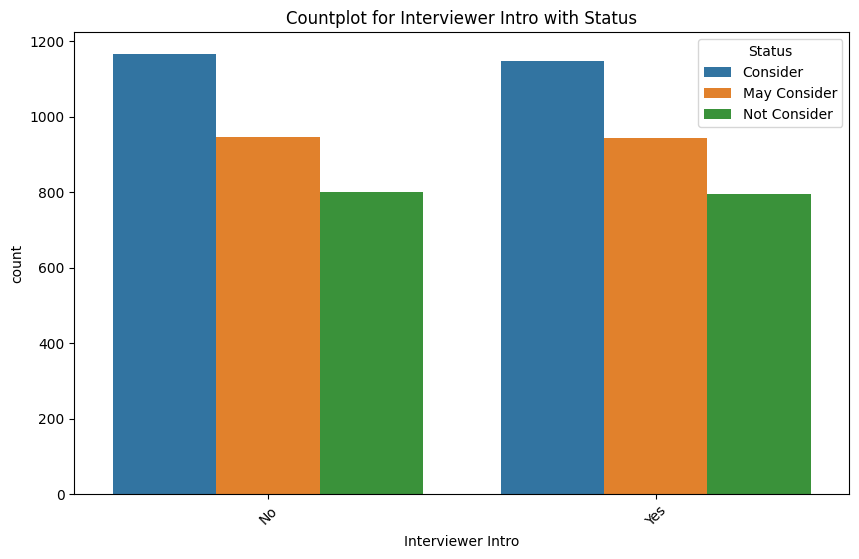

Candidate into
['Yes' 'No']
Number of unique values = 2


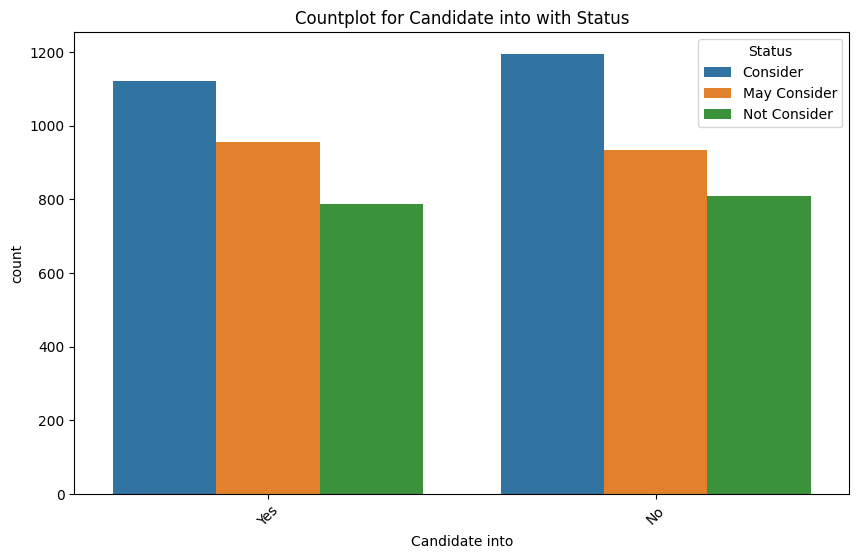

Opp to ask
['Yes' 'No']
Number of unique values = 2


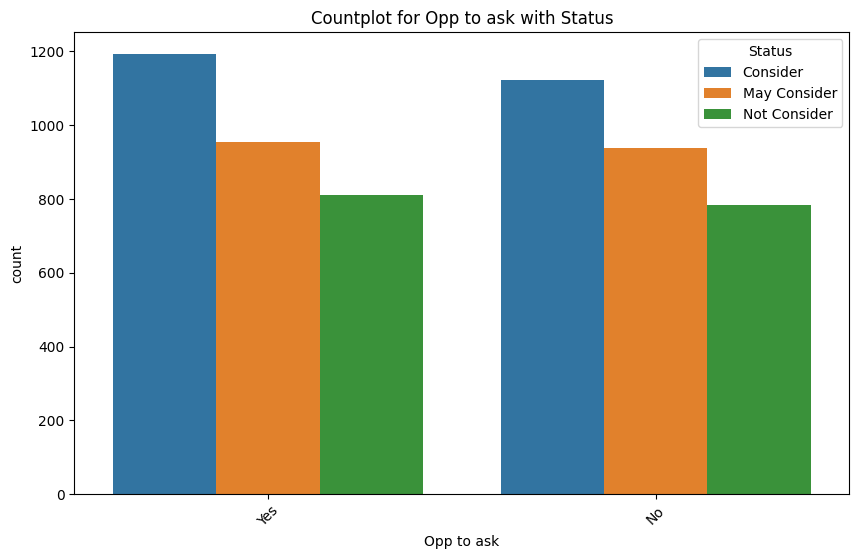

Status
['Consider' 'May Consider' 'Not Consider']
Number of unique values = 3


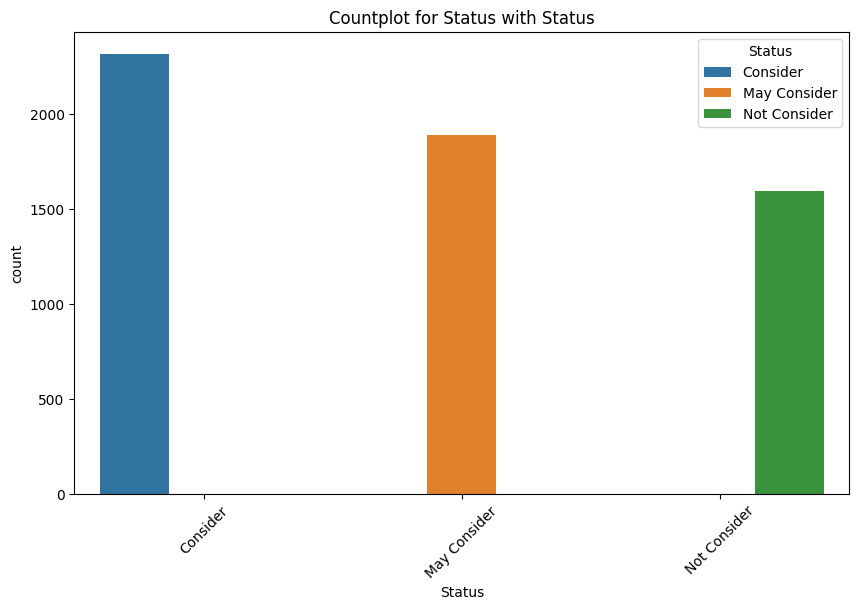

In [ ]:
for i in cat_train_data:
    print(i)
    print(train_data[i].unique())
    print('Number of unique values =', train_data[i].nunique())

    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_data, x=i, hue='Status')
    plt.title(f'Countplot for {i} with Status')
    plt.xticks(rotation=45)
    plt.show()


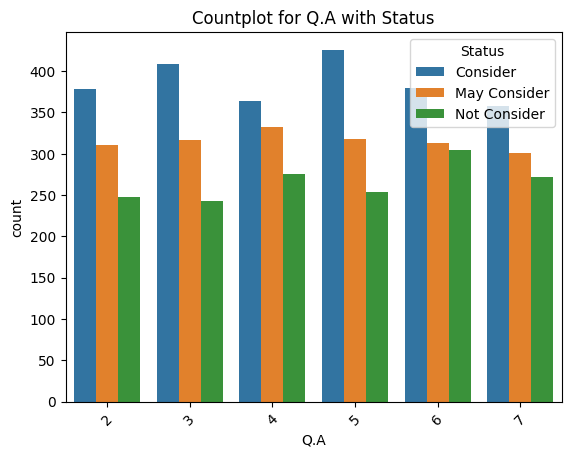

In [ ]:
# Assuming 'Q.A' is the column name with a space
sns.countplot(data=train_data, x='Q.A', hue='Status')
plt.title('Countplot for Q.A with Status')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


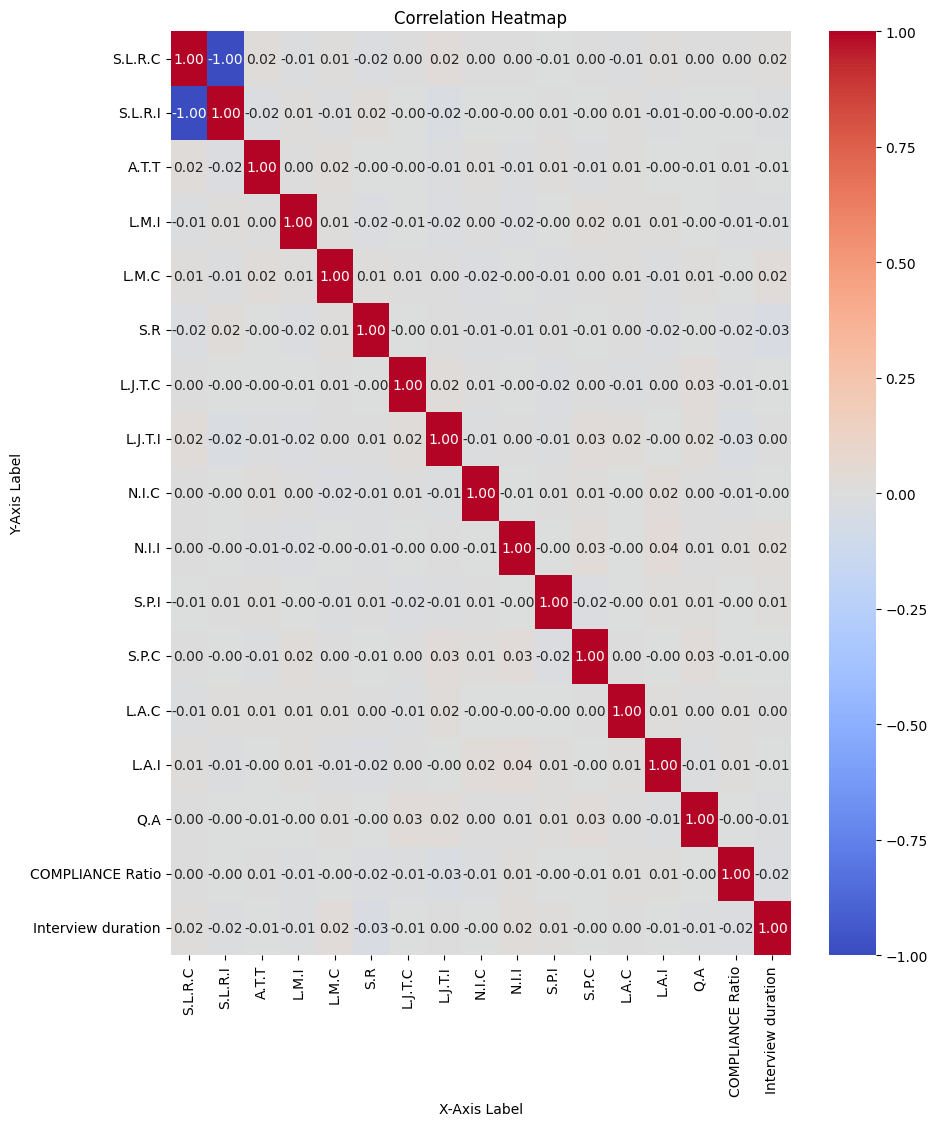

In [ ]:
# Sample correlation matrix
correlation_matrix = train_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")  # 'annot' displays the correlation values, 'fmt' formats the annotation

# Add labels and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [ ]:
np.corrcoef(train_data['S.L.R.C'],train_data['S.L.R.I'])

array([[ 1., -1.],
       [-1.,  1.]])

**"In the training data, the columns 'S.L.R.C' (Speak to Listen Ratio Candidate) and 'S.L.R.I' (Speak to Listen Ratio Interviewer) exhibit similar results, causing multicollinearity. Therefore, it is necessary to remove one of these columns from the dataset."**

In [ ]:
train_data.drop('S.L.R.C',axis=1,inplace=True)

### Let Get Some Information from the data

1. We can see Inverview Id and Candidiate Id has unique values

2. A single Interviewer has taken many of the interview and the status has same number of propotion details

3. They are almost equal number of proportion of job applied for different role

4. S.L.R.I and S.L.R.C are highly negatively correlated so we can keep any one feature to build the model

5. The Candidate who have Joined Late to Interview are having the higest chances of Not Considering

6. They have asked minimum 2 Questions and Maximum 7 Questions in the Interview

## 7.Data Transformation and Feature Engineering:

Data Transformation:

Convert categorical variables into numerical format (e.g., one-hot encoding or label encoding) if needed for modeling. Scale or normalize numerical features to ensure they have similar scales.

Feature Engineering:

Create new features that might be more informative for the problem you're trying to solve. Select relevant features and remove irrelevant ones.

In [ ]:
train_data.head()

,Profile,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,...,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,Developer,0.02,53,88,93,32,88,106,41,66,...,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
1,Sales,0.33,51,53,44,36,93,313,28,62,...,15,4,Neutral,Negative,54,33,No,No,Yes,Consider
2,Program Manager,0.19,60,77,75,54,52,67,26,14,...,7,3,Positive,Positive,31,58,No,Yes,No,Consider
3,Marketing,0.31,93,42,103,49,115,166,62,55,...,10,7,Positive,Negative,24,35,No,Yes,No,Consider
4,QA Automation,0.43,44,44,119,66,190,394,7,32,...,7,3,Negative,Positive,73,60,Yes,Yes,No,Consider


In [ ]:
train_data.Profile.unique()

array(['Developer', 'Sales', 'Program Manager', 'Marketing',
       'QA Automation', 'Account Manager', 'Data Scientist',
       'Product Manager', 'QA Manual', 'HR'], dtype=object)

In [ ]:
# Define a dictionary for mapping similar values
mapping = {
    'Developer': 0,
    'Sales': 1,
    'Program Manager': 2,
    'Marketing':3,
    'QA Automation':4,
    'Account Manager': 5,
    'Data Scientist': 6,
    'Product Manager': 7,
    'QA Manual':8,
    'HR':9
}
train_data['Profile']=train_data['Profile'].replace(mapping)

In [ ]:
train_data['P.E.I'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [ ]:
# Define a dictionary for mapping similar values
mapping = {
    'Neutral': 0,
    'Positive': 1,
    'Negative': 2
}
train_data['P.E.I']=train_data['P.E.I'].replace(mapping)

In [ ]:

train_data['P.E.C'].unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

In [ ]:
# Define a dictionary for mapping similar values
mapping = {
    'Neutral': 0,
    'Positive': 1,
    'Negative': 2
}
train_data['P.E.C']=train_data['P.E.C'].replace(mapping)

In [ ]:
train_data['Interviewer Intro'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Define a dictionary for mapping similar values
mapping = {
    'Yes': 0,
    'No': 1
}
train_data['Interviewer Intro']=train_data['Interviewer Intro'].replace(mapping)

In [ ]:
train_data['Candidate into'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# Define a dictionary for mapping similar values
mapping = {
    'Yes': 0,
    'No': 1
}
train_data['Candidate into']=train_data['Candidate into'].replace(mapping)

In [ ]:
train_data['Opp to ask'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# Define a dictionary for mapping similar values
mapping = {
    'Yes': 0,
    'No': 1
}
train_data['Opp to ask']=train_data['Opp to ask'].replace(mapping)

In [ ]:
train_data.head(2)

,Profile,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,0,0.02,53,88,93,32,88,106,41,66,42,47,13,15,6,0,0,98,37,1,0,0,Consider
1,1,0.33,51,53,44,36,93,313,28,62,32,52,5,15,4,0,2,54,33,1,1,0,Consider


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Profile             5800 non-null   int64  
 1   S.L.R.I             5800 non-null   float64
 2   A.T.T               5800 non-null   int64  
 3   L.M.I               5800 non-null   int64  
 4   L.M.C               5800 non-null   int64  
 5   S.R                 5800 non-null   int64  
 6   L.J.T.C             5800 non-null   int64  
 7   L.J.T.I             5800 non-null   int64  
 8   N.I.C               5800 non-null   int64  
 9   N.I.I               5800 non-null   int64  
 10  S.P.I               5800 non-null   int64  
 11  S.P.C               5800 non-null   int64  
 12  L.A.C               5800 non-null   int64  
 13  L.A.I               5800 non-null   int64  
 14  Q.A                 5800 non-null   int64  
 15  P.E.I               5800 non-null   int64  
 16  P.E.C 

# Now i will be backuping the data

In [ ]:
train_data_backup = train_data.copy(deep=True)

# 8.Data Splitting:

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Separate object for target feature
y= train_data['Status']

# Separate object for Predictors
X = train_data.drop('Status',axis=1)

In [ ]:
print(f'Independent Features shape = {X.shape}, Dependent Features Shape = {y.shape}')

Independent Features shape = (5800, 22), Dependent Features Shape = (5800,)


In [ ]:
X.describe()

,Profile,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,...,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
count,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,...,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000
mean,4.454483,0.251679,69.927414,80.445172,80.084310,45.077414,150.231207,301.063103,37.709828,37.378448,...,8.019655,10.503621,4.507586,1.018103,0.984655,50.315517,37.306724,0.502069,0.506207,0.490345
std,2.880382,0.144272,29.464030,23.450059,23.540515,14.729066,87.265858,172.861851,19.042870,19.138247,...,4.311379,5.724640,1.690976,0.820405,0.815613,28.696299,13.298407,0.500039,0.500005,0.499950
min,0.000000,0.010000,20.000000,40.000000,40.000000,20.000000,0.000000,0.000000,5.000000,5.000000,...,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000
25%,2.000000,0.130000,44.000000,60.000000,59.000000,32.000000,74.000000,153.000000,21.000000,21.000000,...,4.000000,6.000000,3.000000,0.000000,0.000000,25.000000,26.000000,0.000000,0.000000,0.000000
50%,4.000000,0.250000,70.000000,81.000000,81.000000,45.000000,150.000000,300.000000,38.000000,37.000000,...,8.000000,10.000000,5.000000,1.000000,1.000000,51.000000,37.000000,1.000000,1.000000,0.000000
75%,7.000000,0.380000,96.000000,101.000000,101.000000,58.000000,226.000000,451.000000,54.000000,54.000000,...,12.000000,15.000000,6.000000,2.000000,2.000000,75.000000,49.000000,1.000000,1.000000,1.000000
max,9.000000,0.500000,120.000000,120.000000,120.000000,70.000000,300.000000,600.000000,70.000000,70.000000,...,15.000000,20.000000,7.000000,2.000000,2.000000,100.000000,60.000000,1.000000,1.000000,1.000000


## StandardScaler

In [ ]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(X)
X=pd.DataFrame(scaled,columns=X.columns)

In [ ]:
X.describe()

,Profile,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,...,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
count,5.800000e+03,5.800000e+03,5.800000e+03,5.800000e+03,5.800000e+03,5.800000e+03,5.800000e+03,5.800000e+03,5.800000e+03,5.800000e+03,...,5.800000e+03,5.800000e+03,5.800000e+03,5.800000e+03,5.800000e+03,5.800000e+03,5.800000e+03,5.800000e+03,5.800000e+03,5.800000e+03
mean,7.105427e-17,-1.114817e-16,-2.110189e-16,4.655280e-17,4.165251e-17,1.552781e-16,-1.470088e-17,4.777787e-17,-1.200572e-16,-3.920236e-17,...,-1.261826e-16,1.200572e-16,2.554279e-16,6.737905e-17,1.960118e-17,-2.572655e-17,-4.532773e-17,3.675221e-17,5.022802e-17,-2.695162e-17
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,...,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-1.546624e+00,-1.675312e+00,-1.694667e+00,-1.724885e+00,-1.702926e+00,-1.702727e+00,-1.721683e+00,-1.741790e+00,-1.717842e+00,-1.691965e+00,...,-1.628310e+00,-1.660269e+00,-1.483050e+00,-1.241084e+00,-1.207362e+00,-1.753531e+00,-1.677543e+00,-1.004147e+00,-1.012492e+00,-9.808726e-01
25%,-8.522114e-01,-8.434767e-01,-8.800442e-01,-8.719354e-01,-8.957378e-01,-8.879410e-01,-8.736266e-01,-8.566139e-01,-8.775604e-01,-8.558704e-01,...,-9.324166e-01,-7.867760e-01,-8.916247e-01,-1.241084e+00,-1.207362e+00,-8.822636e-01,-8.503048e-01,-1.004147e+00,-1.012492e+00,-9.808726e-01
50%,-1.577992e-01,-1.164092e-02,2.463766e-03,2.366201e-02,3.890181e-02,-5.256305e-03,-2.649683e-03,-6.150548e-03,1.523916e-02,-1.977615e-02,...,-4.559299e-03,-8.798180e-02,2.912260e-01,-2.206838e-02,1.881549e-02,2.385471e-02,-2.306672e-02,9.958706e-01,9.876623e-01,-9.808726e-01
75%,8.838192e-01,8.895145e-01,8.849717e-01,8.766119e-01,8.885741e-01,8.774284e-01,8.683273e-01,8.674547e-01,8.555211e-01,8.685740e-01,...,9.232980e-01,7.855109e-01,8.826513e-01,1.196947e+00,1.244993e+00,8.602716e-01,8.793748e-01,9.958706e-01,9.876623e-01,1.019500e+00
max,1.578231e+00,1.721350e+00,1.699595e+00,1.686914e+00,1.695763e+00,1.692214e+00,1.716384e+00,1.729489e+00,1.695803e+00,1.704668e+00,...,1.619191e+00,1.659004e+00,1.474077e+00,1.196947e+00,1.244993e+00,1.731539e+00,1.706613e+00,9.958706e-01,9.876623e-01,1.019500e+00


## Splitting the data into Training data and Test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)

In [ ]:
print("X data=",X.shape, X_train.shape,X_test.shape,"\n")
print("y data=",y.shape,y_train.shape,y_test.shape)

X data= (5800, 22) (4640, 22) (1160, 22) 

y data= (5800,) (4640,) (1160,)


## 9.Handling Imbalanced Data:

## SMOTE Techniques

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set only
smote = SMOTE(random_state=14)
X_train ,y_train = smote.fit_resample(X_train, y_train)

# Build the Machine Learning models

# Build the Logistic regression Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [ ]:
# Model Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Train Accuracy",accuracy_score(y_train, y_train_pred)*100)
print("Test Accuracy",accuracy_score(y_test, y_test_pred)*100,'\n')

Train Accuracy 99.36282541416348
Test Accuracy 98.9655172413793 



In [ ]:
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

confusion_matrix:- 
 [[480   4   0]
 [  1 356   7]
 [  0   0 312]] 

classification_report:- 
               precision    recall  f1-score   support

    Consider       1.00      0.99      0.99       484
May Consider       0.99      0.98      0.98       364
Not Consider       0.98      1.00      0.99       312

    accuracy                           0.99      1160
   macro avg       0.99      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160



# DecisionTree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DM = DecisionTreeClassifier()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 85.94827586206897 

confusion_matrix:- 
 [[437  47   0]
 [ 34 292  38]
 [  1  43 268]] 

classification_report:- 
               precision    recall  f1-score   support

    Consider       0.93      0.90      0.91       484
May Consider       0.76      0.80      0.78       364
Not Consider       0.88      0.86      0.87       312

    accuracy                           0.86      1160
   macro avg       0.86      0.85      0.85      1160
weighted avg       0.86      0.86      0.86      1160



# RandomForest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 88.10344827586208 

confusion_matrix:- 
 [[446  38   0]
 [ 30 303  31]
 [  0  39 273]] 

classification_report:- 
               precision    recall  f1-score   support

    Consider       0.94      0.92      0.93       484
May Consider       0.80      0.83      0.81       364
Not Consider       0.90      0.88      0.89       312

    accuracy                           0.88      1160
   macro avg       0.88      0.88      0.88      1160
weighted avg       0.88      0.88      0.88      1160



# K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_train_pred = KNN.predict(X_train)
y_test_pred = KNN.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 82.55962133624614 

Test Accuracy:- 62.8448275862069 

confusion_matrix:- 
 [[343 126  15]
 [ 81 198  85]
 [ 11 113 188]] 

classification_report:- 
               precision    recall  f1-score   support

    Consider       0.79      0.71      0.75       484
May Consider       0.45      0.54      0.49       364
Not Consider       0.65      0.60      0.63       312

    accuracy                           0.63      1160
   macro avg       0.63      0.62      0.62      1160
weighted avg       0.65      0.63      0.64      1160



# SVM(Support Vector Machine)

In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier
SVM = SVC()

# Train the SVM classifier on the training data
SVM.fit(X_train, y_train)
y_train_pred = SVM.predict(X_train)
y_test_pred = SVM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 99.58128527216458 

Test Accuracy:- 94.56896551724138 

confusion_matrix:- 
 [[465  19   0]
 [ 10 341  13]
 [  0  21 291]] 

classification_report:- 
               precision    recall  f1-score   support

    Consider       0.98      0.96      0.97       484
May Consider       0.90      0.94      0.92       364
Not Consider       0.96      0.93      0.94       312

    accuracy                           0.95      1160
   macro avg       0.94      0.94      0.94      1160
weighted avg       0.95      0.95      0.95      1160



# kernels = Linear , RBF(Radial Basis Function), Poly, Sigmoid

In [ ]:
# List of kernel names
kernel_names = ['linear', 'rbf', 'poly', 'sigmoid']

# Create SVM classifiers for different kernels in a single line
SVM_classifiers = {kernel: SVC(kernel=kernel).fit(X_train, y_train) for kernel in kernel_names}

# Evaluate and print results for each kernel
for kernel, SVM in SVM_classifiers.items():
    y_train_pred = SVM.predict(X_train)
    y_test_pred = SVM.predict(X_test)
    print(f"Kernel: {kernel}")
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("\n")

Kernel: linear
Train Accuracy: 99.21718550882942
Test Accuracy: 99.13793103448276
Confusion Matrix:
 [[483   1   0]
 [  1 358   5]
 [  0   3 309]]
Classification Report:
               precision    recall  f1-score   support

    Consider       1.00      1.00      1.00       484
May Consider       0.99      0.98      0.99       364
Not Consider       0.98      0.99      0.99       312

    accuracy                           0.99      1160
   macro avg       0.99      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160



Kernel: rbf
Train Accuracy: 99.58128527216458
Test Accuracy: 94.56896551724138
Confusion Matrix:
 [[465  19   0]
 [ 10 341  13]
 [  0  21 291]]
Classification Report:
               precision    recall  f1-score   support

    Consider       0.98      0.96      0.97       484
May Consider       0.90      0.94      0.92       364
Not Consider       0.96      0.93      0.94       312

    accuracy                           0.95      1160
   mac

In [ ]:
SVM_linear=SVC(kernel= 'linear')
# Train the SVM classifier on the training data
SVM_linear.fit(X_train, y_train)
y_train_pred = SVM_linear.predict(X_train)
y_test_pred = SVM_linear.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 99.21718550882942 

Test Accuracy:- 99.13793103448276 

confusion_matrix:- 
 [[483   1   0]
 [  1 358   5]
 [  0   3 309]] 

classification_report:- 
               precision    recall  f1-score   support

    Consider       1.00      1.00      1.00       484
May Consider       0.99      0.98      0.99       364
Not Consider       0.98      0.99      0.99       312

    accuracy                           0.99      1160
   macro avg       0.99      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160



# hyperparameter tuning for SVM

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameters and their possible values specific to the RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100,100],
    'gamma': [0.001, 0.01, 0.1, 1],
    #'kernal':['linear','rbf','poly','sigmoid']
}

# Create the SVM classifier with the RBF kernel
SVM = SVC(kernel='linear')

# Create a RandomizedSearchCV object
svm_model = RandomizedSearchCV(SVM, param_distributions=param_grid, cv=5, random_state=0, n_iter=20)

# Perform the randomized search on the training data
svm_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear'), n_iter=20,
                   param_distributions={'C': [0.1, 1, 10, 100, 100],
                                        'gamma': [0.001, 0.01, 0.1, 1]},
                   random_state=0)

In [ ]:
# Get the best hyperparameters from the search
best_params = svm_model.best_params_

# Train a new SVM classifier with the best hyperparameters for the RBF kernel
best_SVM = SVC(kernel='linear', C=best_params['C'], gamma=best_params['gamma'])
best_SVM.fit(X_train, y_train)

# Make predictions with the tuned RBF model
y_train_pred = best_SVM.predict(X_train)
y_test_pred = best_SVM.predict(X_test)

# Evaluate the tuned RBF model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Hyperparameters for RBF Kernel:", best_params)
print("Train Accuracy with RBF Kernel: {:.2f}%".format(train_accuracy * 100))
print("Test Accuracy with RBF Kernel: {:.2f}%".format(test_accuracy * 100))
print("Confusion Matrix with RBF Kernel:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report with RBF Kernel:\n", classification_report(y_test, y_test_pred))

Best Hyperparameters for RBF Kernel: {'gamma': 0.001, 'C': 100}
Train Accuracy with RBF Kernel: 99.64%
Test Accuracy with RBF Kernel: 99.48%
Confusion Matrix with RBF Kernel:
 [[484   0   0]
 [  1 363   0]
 [  3   2 307]]
Classification Report with RBF Kernel:
               precision    recall  f1-score   support

    Consider       0.99      1.00      1.00       484
May Consider       0.99      1.00      1.00       364
Not Consider       1.00      0.98      0.99       312

    accuracy                           0.99      1160
   macro avg       1.00      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160



In Support Vector Machines (SVM), the `decision_function_shape` parameter is used to specify how the decision function should be computed when dealing with a multi-class classification problem. SVM inherently supports binary classification, but when it comes to handling multiple classes, strategies are needed to extend the model for such scenarios.

Here are the two options for the `decision_function_shape` parameter:

1. **'ovo' (One-vs-One):**
   - In the 'ovo' strategy, a binary classifier is trained for every pair of classes.
   - For \(N\) classes, \(\frac{N \times (N-1)}{2}\) binary classifiers are trained.
   - During prediction, each classifier votes for a class, and the class with the most votes is the final predicted class.

2. **'ovr' (One-vs-Rest or One-vs-All):**
   - In the 'ovr' strategy, a binary classifier is trained for each class against the rest of the classes.
   - For \(N\) classes, \(N\) binary classifiers are trained.
   - During prediction, the class associated with the classifier that outputs the highest confidence (decision function value) is chosen as the predicted class.

**Choosing Between 'ovo' and 'ovr':**
- 'ovo' is often used when the number of classes is moderate, and training many binary classifiers is not computationally expensive.
- 'ovr' is a more computationally efficient strategy, especially when dealing with a large number of classes.
  
The choice between 'ovo' and 'ovr' depends on factors such as the dataset size, the number of classes, and computational resources. In practice, 'ovr' is commonly used, but it's beneficial to experiment with both strategies to see which one performs better for a specific task. The default choice may vary depending on the SVM library or implementation you are using.


In [ ]:
from sklearn.model_selection import GridSearchCV
# defining Parameter Range
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.1, 1],
    'kernel': ['linear'],
    'decision_function_shape': ['ovo', 'ovr'],
    'random_state': [None, 42, 123],  # Add values for random_state
}

grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv=5)

# fitting the model for grid search
grid.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear, random_state=None;, score=0.978 total time=   0.4s
[CV 2/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear, random_state=None;, score=0.981 total time=   0.4s
[CV 3/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear, random_state=None;, score=0.975 total time=   0.4s
[CV 4/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear, random_state=None;, score=0.990 total time=   0.4s
[CV 5/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear, random_state=None;, score=0.991 total time=   0.4s
[CV 1/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear, random_state=42;, score=0.978 total time=   0.2s
[CV 2/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear, random_state=42;, score=0.981 total time=   0.2s
[CV 3/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear, 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.1, 1],
                         'kernel': ['linear'],
                         'random_state': [None, 42, 123]},
             verbose=3)

In [ ]:
# print best parameter after tuning

print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'linear', 'random_state': None}
SVC(C=100, decision_function_shape='ovo', gamma=1, kernel='linear')


In [ ]:
from sklearn.svm import SVC
best_model= SVC(C=100, decision_function_shape='ovo', gamma=1, kernel='linear',random_state=None)
best_model.fit(X_train,y_train)
y_train_pred7=best_model.predict(X_train)
y_test_pred7=best_model.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 99.63590023666484 

Test Accuracy:- 99.48275862068967 

confusion_matrix:- 
 [[484   0   0]
 [  1 363   0]
 [  3   2 307]] 

classification_report:- 
               precision    recall  f1-score   support

    Consider       0.99      1.00      1.00       484
May Consider       0.99      1.00      1.00       364
Not Consider       1.00      0.98      0.99       312

    accuracy                           0.99      1160
   macro avg       1.00      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160



# Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
NaiveBayes = GaussianNB()

# Train the Naive Bayes classifier on the training data
NaiveBayes.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = NaiveBayes.predict(X_train)
y_test_pred = NaiveBayes.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 84.27089022392136 

Test Accuracy:- 82.75862068965517 

confusion_matrix:- 
 [[417  67   0]
 [ 44 272  48]
 [  0  41 271]] 

classification_report:- 
               precision    recall  f1-score   support

    Consider       0.90      0.86      0.88       484
May Consider       0.72      0.75      0.73       364
Not Consider       0.85      0.87      0.86       312

    accuracy                           0.83      1160
   macro avg       0.82      0.83      0.82      1160
weighted avg       0.83      0.83      0.83      1160



# AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Create classifiers for different algorithms in a single line
classifiers = {
    'AdaBoost': AdaBoostClassifier().fit(X_train, y_train),
    'GradientBoosting': GradientBoostingClassifier().fit(X_train, y_train)
}

# Evaluate and print results for each classifier
for classifier_name, classifier in classifiers.items():
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    print(f"Classifier: {classifier_name}")
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("\n")

Classifier: AdaBoost
Train Accuracy: 87.27471327143638
Test Accuracy: 84.6551724137931
Confusion Matrix:
 [[358 126   0]
 [  3 346  15]
 [  0  34 278]]
Classification Report:
               precision    recall  f1-score   support

    Consider       0.99      0.74      0.85       484
May Consider       0.68      0.95      0.80       364
Not Consider       0.95      0.89      0.92       312

    accuracy                           0.85      1160
   macro avg       0.87      0.86      0.85      1160
weighted avg       0.88      0.85      0.85      1160



Classifier: GradientBoosting
Train Accuracy: 98.16129619515748
Test Accuracy: 93.36206896551724
Confusion Matrix:
 [[463  21   0]
 [ 11 331  22]
 [  0  23 289]]
Classification Report:
               precision    recall  f1-score   support

    Consider       0.98      0.96      0.97       484
May Consider       0.88      0.91      0.90       364
Not Consider       0.93      0.93      0.93       312

    accuracy                          

# Multi-Layer Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create an MLP classifier
MLP = MLPClassifier()

# Fit the MLP model to the training data
MLP.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = MLP.predict(X_train)
y_test_pred = MLP.predict(X_test)

# Model Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Train Accuracy: 100.0
Test Accuracy: 96.72413793103448
Confusion Matrix:
 [[478   6   0]
 [  5 349  10]
 [  0  17 295]]
Classification Report:
               precision    recall  f1-score   support

    Consider       0.99      0.99      0.99       484
May Consider       0.94      0.96      0.95       364
Not Consider       0.97      0.95      0.96       312

    accuracy                           0.97      1160
   macro avg       0.97      0.96      0.96      1160
weighted avg       0.97      0.97      0.97      1160



# hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create an MLP classifier
MLP = MLPClassifier()

# Define a parameter distribution to search for the best hyperparameters
param_dist = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (100, 50, 25)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'max_iter': [100, 200, 300, 400, 500,600],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'random_state': [1, 42, 100]  # Add the values for random_state as needed
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=MLP, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the random search
best_params = random_search.best_params_
best_MLP = random_search.best_estimator_
y_train_pred = best_MLP.predict(X_train)

# Predict on the test data using the best MLP model
y_test_pred = best_MLP.predict(X_test)

# Model Evaluation
print("Best Parameters:", best_params)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Best Parameters: {'solver': 'lbfgs', 'random_state': 1, 'max_iter': 500, 'learning_rate': 'constant', 'hidden_layer_sizes': (100, 50, 25), 'alpha': 0.0001, 'activation': 'identity'}
Train Accuracy: 99.59949026033134
Test Accuracy: 99.48275862068967
Confusion Matrix:
 [[484   0   0]
 [  1 360   3]
 [  0   2 310]]
Classification Report:
               precision    recall  f1-score   support

    Consider       1.00      1.00      1.00       484
May Consider       0.99      0.99      0.99       364
Not Consider       0.99      0.99      0.99       312

    accuracy                           0.99      1160
   macro avg       0.99      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160



# "I achieved the highest accuracy using the Linear kernel in the Support Vector Machine (SVM) model."

# now test data

In [6]:
test_data.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,702127796635,2.381365e+09,229,Product Manager,0.52,0.48,103,53,77,30,26.0,287,8,22,69.0,88,5,19.0,4.0,Positive,Negative,24.0,49,Yes,Yes,Yes
1,613490569071,8.428514e+08,194,Product Manager,0.87,0.13,54,57,57,68,179.0,253,62,40,47.0,81,1,9.0,7.0,Positive,Neutral,99.0,24,No,Yes,Yes
2,759998772623,7.681665e+09,266,QA Automation,0.60,0.40,50,117,93,36,137.0,31,40,52,57.0,13,7,15.0,3.0,Negative,Positive,16.0,16,Yes,No,Yes
3,391760082113,6.627808e+09,256,HR,0.52,0.48,102,114,66,31,176.0,242,69,66,59.0,10,10,4.0,6.0,Negative,Neutral,66.0,40,No,No,Yes
4,941599210196,1.148634e+09,267,HR,0.59,0.41,96,73,115,23,218.0,215,69,42,74.0,20,10,4.0,6.0,Positive,Positive,47.0,38,No,Yes,Yes


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        1200 non-null   int64  
 1   Candidate Id        1200 non-null   float64
 2   Interviewer Id      1200 non-null   int64  
 3   Profile             1200 non-null   object 
 4   S.L.R.C             1200 non-null   float64
 5   S.L.R.I             1199 non-null   float64
 6   A.T.T               1200 non-null   int64  
 7   L.M.I               1200 non-null   int64  
 8   L.M.C               1200 non-null   int64  
 9   S.R                 1200 non-null   int64  
 10  L.J.T.C             1199 non-null   float64
 11  L.J.T.I             1200 non-null   int64  
 12  N.I.C               1200 non-null   int64  
 13  N.I.I               1200 non-null   int64  
 14  S.P.I               1198 non-null   float64
 15  S.P.C               1200 non-null   int64  
 16  L.A.C 

In [8]:
test_data.duplicated().sum()

0

In [9]:
test_data.isna().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               1
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               1
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 2
S.P.C                 0
L.A.C                 0
L.A.I                 1
Q.A                   1
P.E.I                 2
P.E.C                 2
COMPLIANCE Ratio      1
Interview duration    0
Interviewer Intro     2
Candidate into        0
Opp to ask            0
dtype: int64

In [10]:
test_data['S.L.R.I'].isna().sum()

1

In [11]:
test_data[(test_data['S.L.R.I'].isna())]

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
8,163655844401,8.134877e+09,216,Account Manager,0.88,NaN,88,48,80,20,258.0,304,60,9,20.0,14,5,9.0,7.0,Neutral,Negative,84.0,15,No,Yes,Yes


<Axes: >

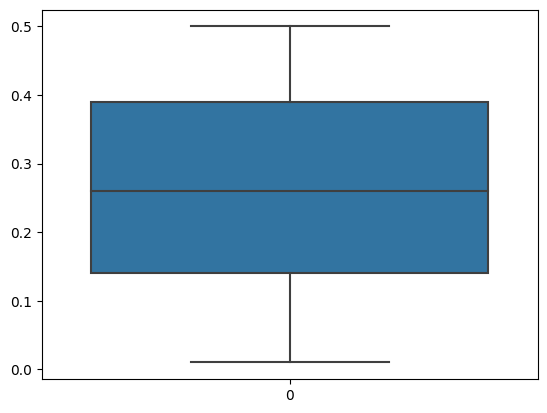

In [12]:
sns.boxplot(test_data['S.L.R.I'])

In [13]:
test_data['S.L.R.I'].mean(),test_data['S.L.R.I'].median()

(0.2623686405337782, 0.26)

In [14]:
test_data['S.L.R.I'].fillna(test_data['S.L.R.I'].mean(), inplace=True)

In [ ]:
test_data.isna().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               1
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 2
S.P.C                 0
L.A.C                 0
L.A.I                 1
Q.A                   1
P.E.I                 2
P.E.C                 2
COMPLIANCE Ratio      1
Interview duration    0
Interviewer Intro     2
Candidate into        0
Opp to ask            0
dtype: int64

In [15]:
test_data[(test_data['L.J.T.C'].isna())]

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
268,701920225942,4.704291e+09,235,QA Automation,0.54,0.46,96,84,67,34,NaN,25,27,51,46.0,25,8,19.0,6.0,Negative,Positive,83.0,53,No,No,Yes


<Axes: >

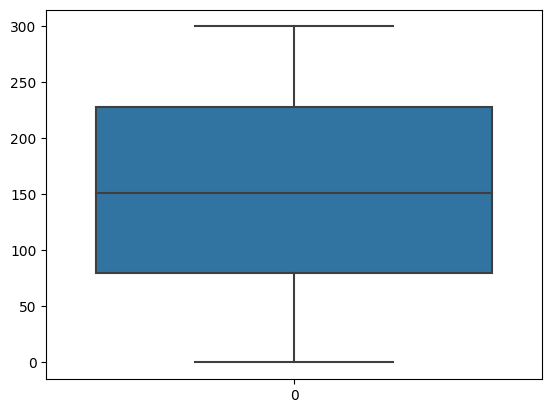

In [16]:
sns.boxplot(test_data['L.J.T.C'])

In [17]:
test_data['L.J.T.C'].mean(),test_data['L.J.T.C'].median(),

(151.9090909090909, 151.0)

In [18]:
test_data['L.J.T.C'].fillna(test_data['L.J.T.C'].mean(), inplace=True)

In [19]:
test_data.isna().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 2
S.P.C                 0
L.A.C                 0
L.A.I                 1
Q.A                   1
P.E.I                 2
P.E.C                 2
COMPLIANCE Ratio      1
Interview duration    0
Interviewer Intro     2
Candidate into        0
Opp to ask            0
dtype: int64

In [20]:
test_data[(test_data['S.P.I'].isna())]

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
56,652968957645,1.880756e+09,236,Marketing,0.61,0.39,113,74,65,59,220.0,355,36,66,NaN,65,8,20.0,5.0,Negative,Positive,49.0,49,Yes,Yes,No
305,549570476358,6.434601e+09,197,HR,0.81,0.19,28,64,44,29,255.0,299,27,52,NaN,20,9,9.0,2.0,Positive,Positive,85.0,45,No,No,Yes


<Axes: >

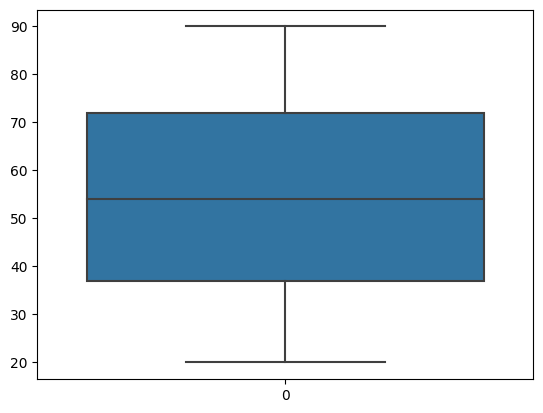

In [21]:
sns.boxplot(test_data['S.P.I'])

In [22]:
test_data['S.P.I'].mean(),test_data['S.P.I'].median(),

(54.62771285475793, 54.0)

In [23]:
test_data['S.P.I'].fillna(test_data['S.P.I'].mean(), inplace=True)

In [24]:
test_data.isna().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 1
Q.A                   1
P.E.I                 2
P.E.C                 2
COMPLIANCE Ratio      1
Interview duration    0
Interviewer Intro     2
Candidate into        0
Opp to ask            0
dtype: int64

<Axes: >

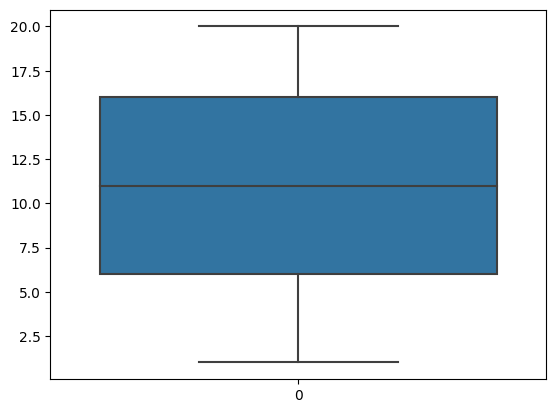

In [25]:
sns.boxplot(test_data['L.A.I'])

In [26]:
test_data['L.A.I'].mean(),test_data['L.A.I'].median()

(10.720600500417014, 11.0)

In [ ]:
test_data['L.A.I'].fillna(test_data['L.A.I'].mean(), inplace=True)

<Axes: >

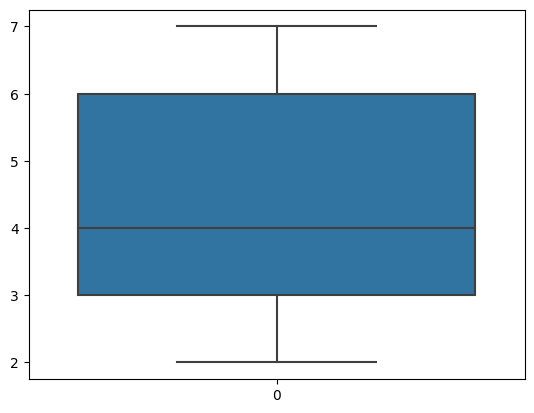

In [27]:
sns.boxplot(test_data['Q.A'])

In [30]:
test_data['Q.A'].mean(),test_data['Q.A'].median()

(4.368640533778148, 4.0)

In [28]:
test_data['Q.A'].fillna(test_data['Q.A'].mean(), inplace=True)

In [29]:
test_data.isna().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 1
Q.A                   0
P.E.I                 2
P.E.C                 2
COMPLIANCE Ratio      1
Interview duration    0
Interviewer Intro     2
Candidate into        0
Opp to ask            0
dtype: int64

In [31]:
test_data[(test_data['P.E.I'].isna())]

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
61,996460231973,6.886458e+09,265,Data Scientist,0.81,0.19,28,77,108,27,263.0,358,45,57,39.0,82,6,4.0,6.0,NaN,Negative,83.0,35,Yes,Yes,No
215,147269648867,5.669143e+09,267,Data Scientist,0.54,0.46,83,41,68,56,160.0,17,22,16,44.0,47,1,20.0,4.0,NaN,Negative,43.0,46,No,No,Yes


In [32]:
test_data['P.E.I'].mode()[0]

'Negative'

In [33]:
test_data['P.E.I'].fillna('Negative', inplace=True)

In [34]:
test_data.isna().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 1
Q.A                   0
P.E.I                 0
P.E.C                 2
COMPLIANCE Ratio      1
Interview duration    0
Interviewer Intro     2
Candidate into        0
Opp to ask            0
dtype: int64

In [35]:
test_data[(test_data['P.E.C'].isna())]

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
152,118123009182,9.077695e+09,192,Developer,0.59,0.41,76,79,85,70,183.0,170,25,21,36.0,50,3,11.0,5.0,Positive,NaN,94.0,42,Yes,No,Yes
247,906894293499,4.964043e+09,221,Marketing,0.75,0.25,113,42,102,40,82.0,152,17,57,66.0,57,6,4.0,4.0,Neutral,NaN,65.0,21,No,Yes,No


In [36]:
test_data['P.E.C'].mode()[0]

'Positive'

In [ ]:
test_data['P.E.C'].fillna('Positive', inplace=True)

In [37]:
test_data.isna().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 1
Q.A                   0
P.E.I                 0
P.E.C                 2
COMPLIANCE Ratio      1
Interview duration    0
Interviewer Intro     2
Candidate into        0
Opp to ask            0
dtype: int64

<Axes: >

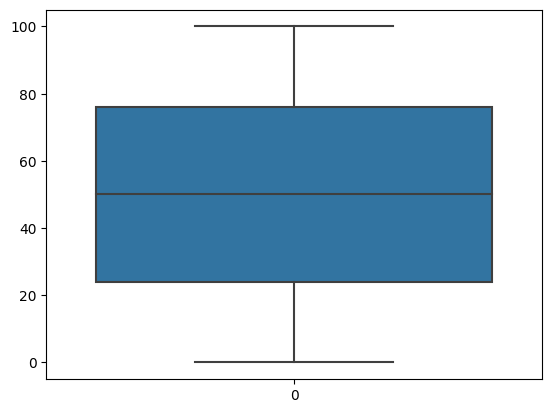

In [ ]:
sns.boxplot(test_data['COMPLIANCE Ratio'])

In [38]:
test_data['COMPLIANCE Ratio'].mean(),test_data['COMPLIANCE Ratio'].median()

(50.25020850708924, 50.0)

In [39]:
test_data['COMPLIANCE Ratio'].fillna(test_data['COMPLIANCE Ratio'].mean(), inplace=True)

In [40]:
test_data.isna().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 1
Q.A                   0
P.E.I                 0
P.E.C                 2
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     2
Candidate into        0
Opp to ask            0
dtype: int64

In [41]:
test_data['Interviewer Intro'].mode()[0]

'No'

In [42]:
test_data['Interviewer Intro'].fillna('No', inplace=True)

In [43]:
test_data.isna().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 1
Q.A                   0
P.E.I                 0
P.E.C                 2
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     0
Candidate into        0
Opp to ask            0
dtype: int64

In [44]:
test_data.drop(['Candidate Id','Interview Id'],axis=1,inplace=True) #Interview Id Status

In [45]:
test_data['Interviewer Id']

0       229
1       194
2       266
3       256
4       267
       ... 
1195    193
1196    233
1197    214
1198    231
1199    214
Name: Interviewer Id, Length: 1200, dtype: int64

In [46]:
test_data.drop('Interviewer Id',axis=1,inplace=True)

In [47]:
test_data.head()

,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,Product Manager,0.52,0.48,103,53,77,30,26.0,287,8,22,69.0,88,5,19.0,4.0,Positive,Negative,24.0,49,Yes,Yes,Yes
1,Product Manager,0.87,0.13,54,57,57,68,179.0,253,62,40,47.0,81,1,9.0,7.0,Positive,Neutral,99.0,24,No,Yes,Yes
2,QA Automation,0.60,0.40,50,117,93,36,137.0,31,40,52,57.0,13,7,15.0,3.0,Negative,Positive,16.0,16,Yes,No,Yes
3,HR,0.52,0.48,102,114,66,31,176.0,242,69,66,59.0,10,10,4.0,6.0,Negative,Neutral,66.0,40,No,No,Yes
4,HR,0.59,0.41,96,73,115,23,218.0,215,69,42,74.0,20,10,4.0,6.0,Positive,Positive,47.0,38,No,Yes,Yes


# Test Data

In [49]:
num_test_data=test_data.select_dtypes(exclude='object')
num_test_data.head(3)

,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration
0,0.52,0.48,103,53,77,30,26.0,287,8,22,69.0,88,5,19.0,4.0,24.0,49
1,0.87,0.13,54,57,57,68,179.0,253,62,40,47.0,81,1,9.0,7.0,99.0,24
2,0.60,0.40,50,117,93,36,137.0,31,40,52,57.0,13,7,15.0,3.0,16.0,16


In [50]:
cat_test_data=test_data.select_dtypes(include='object')
cat_test_data.head(3)

,Profile,P.E.I,P.E.C,Interviewer Intro,Candidate into,Opp to ask
0,Product Manager,Positive,Negative,Yes,Yes,Yes
1,Product Manager,Positive,Neutral,No,Yes,Yes
2,QA Automation,Negative,Positive,Yes,No,Yes


# Visualization on Test data

S.L.R.C


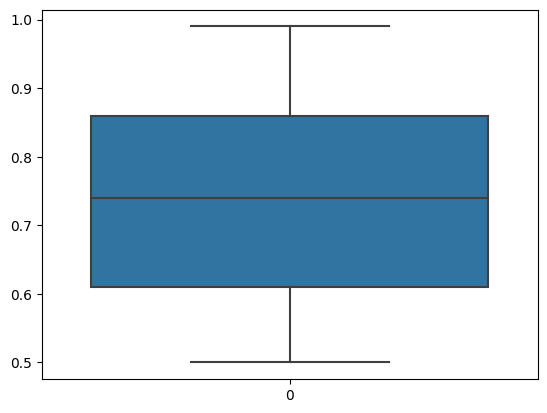

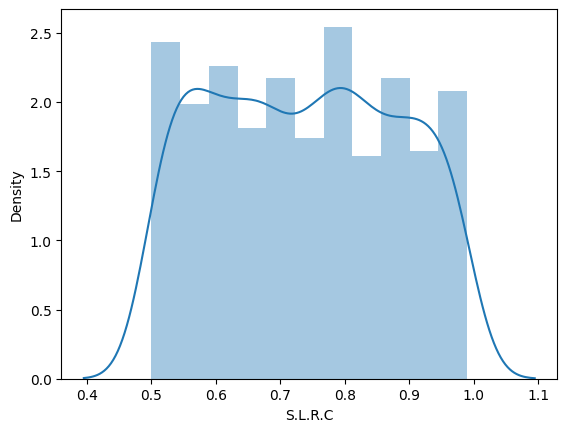

S.L.R.I


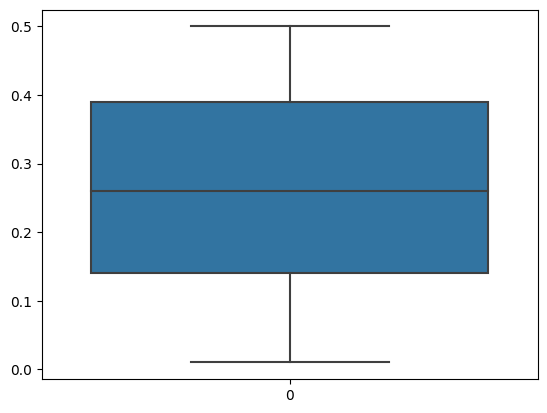

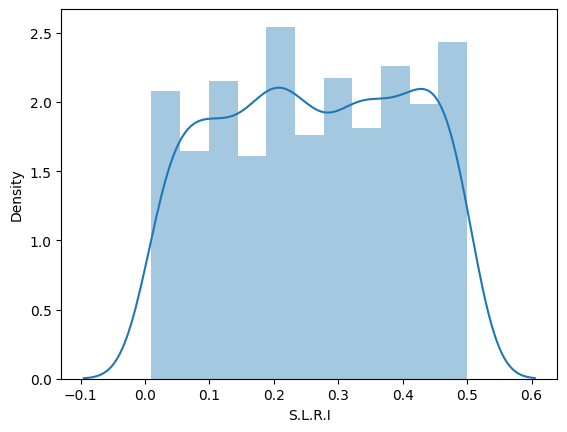

A.T.T


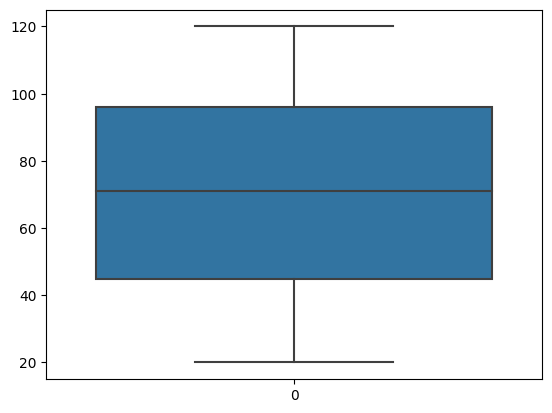

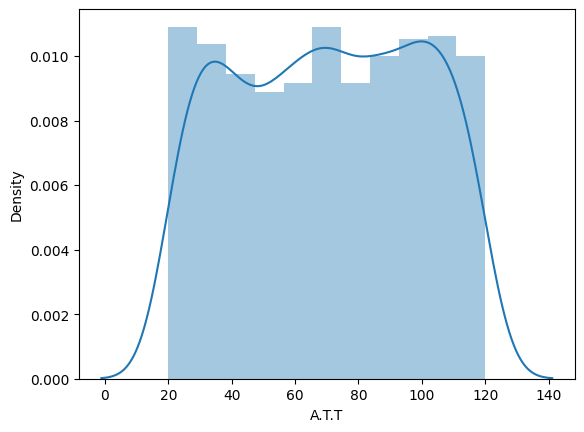

L.M.I


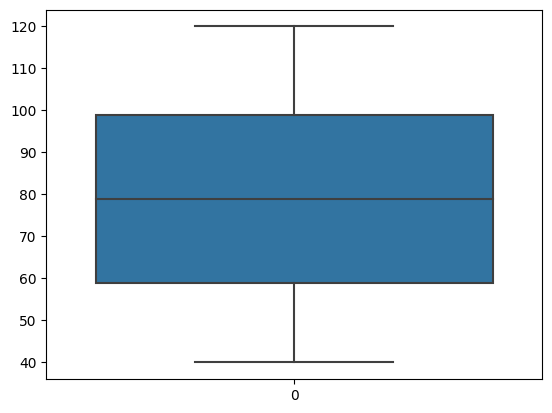

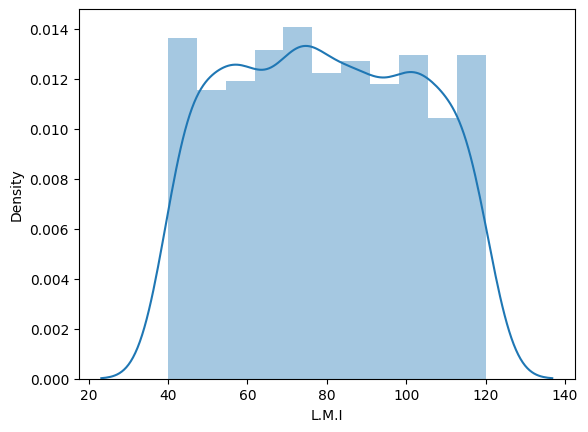

L.M.C


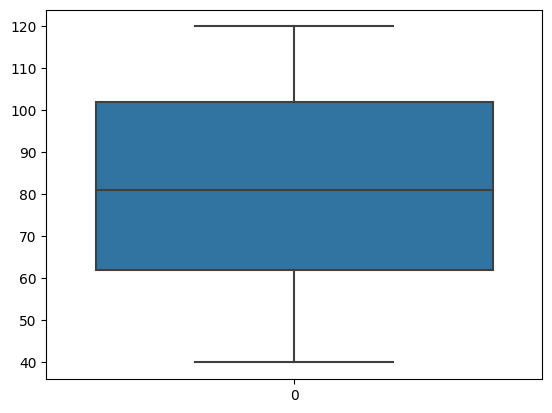

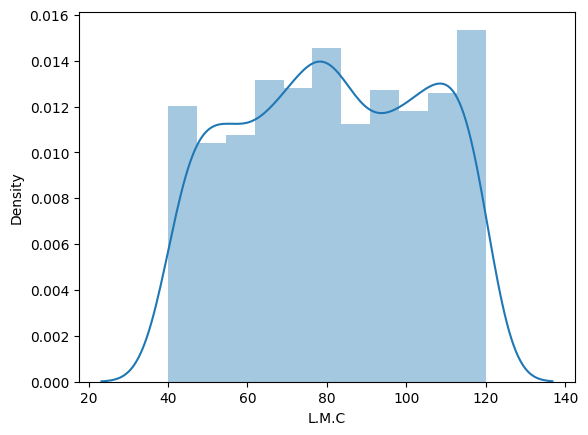

S.R


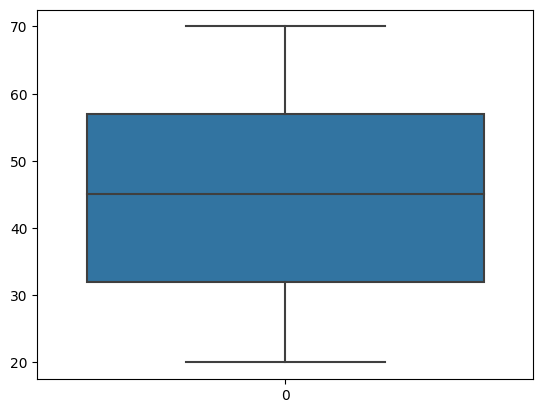

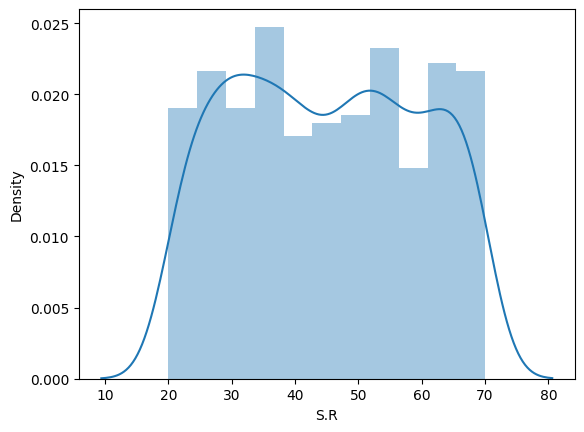

L.J.T.C


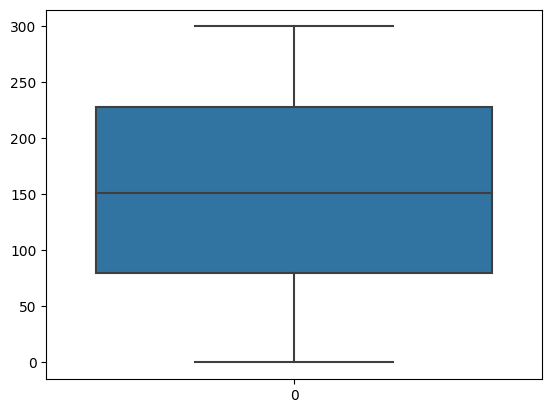

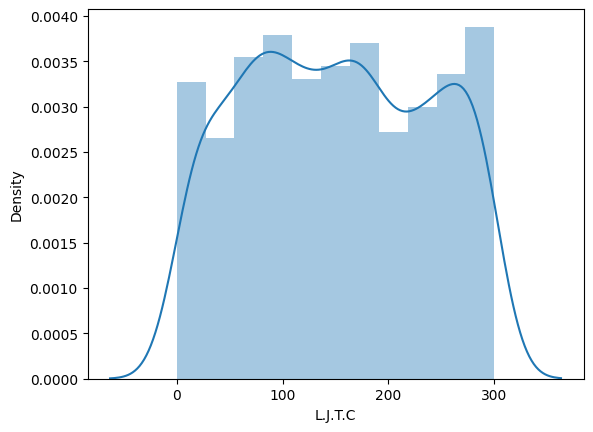

L.J.T.I


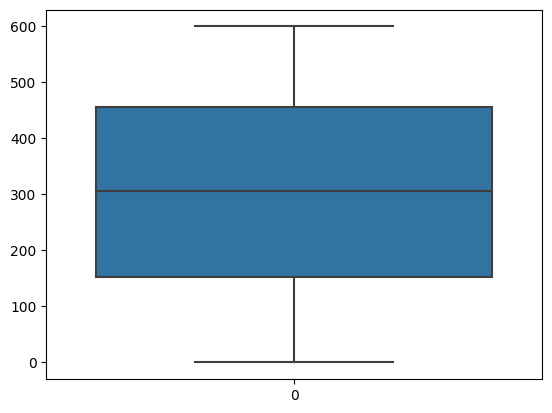

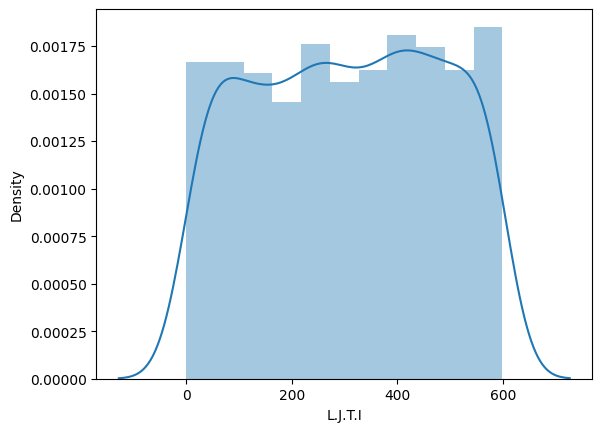

N.I.C


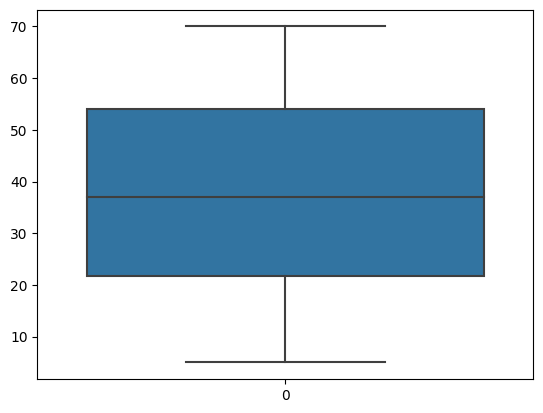

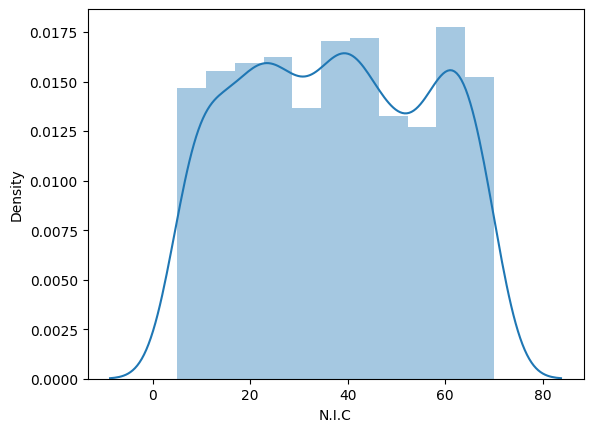

N.I.I


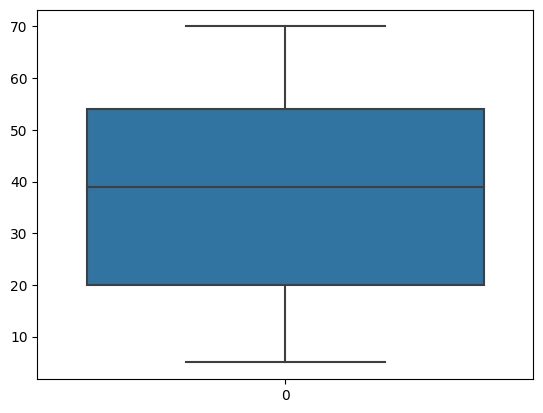

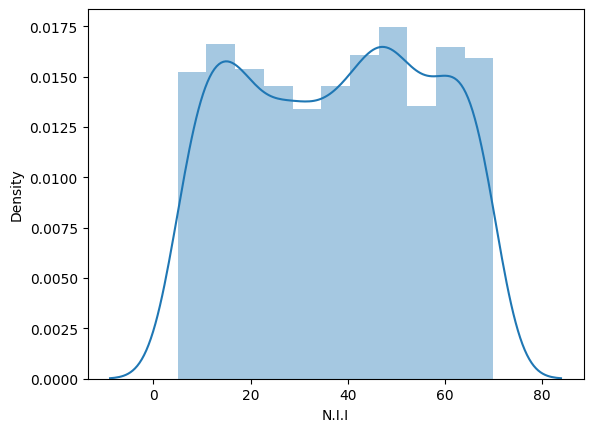

S.P.I


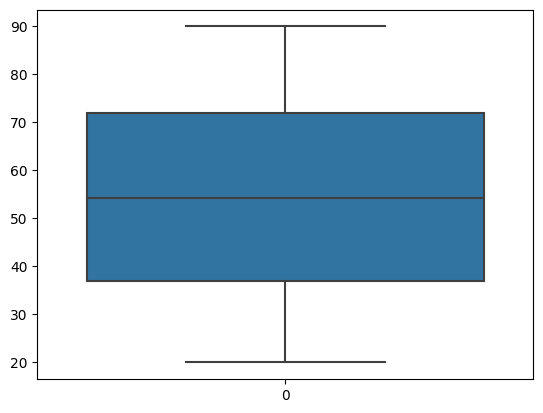

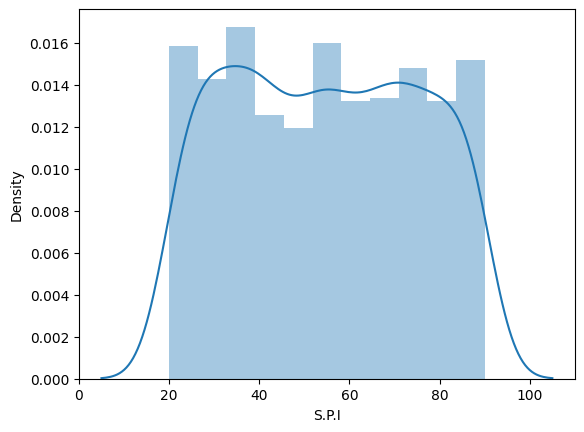

S.P.C


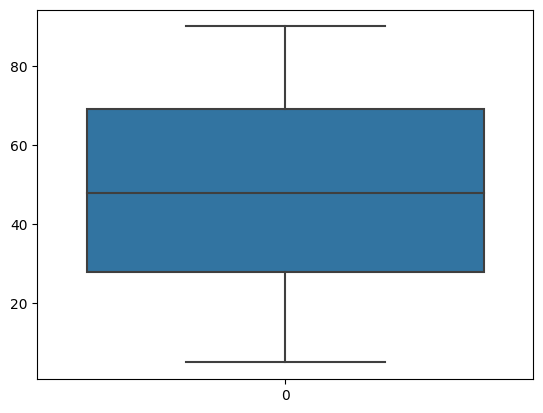

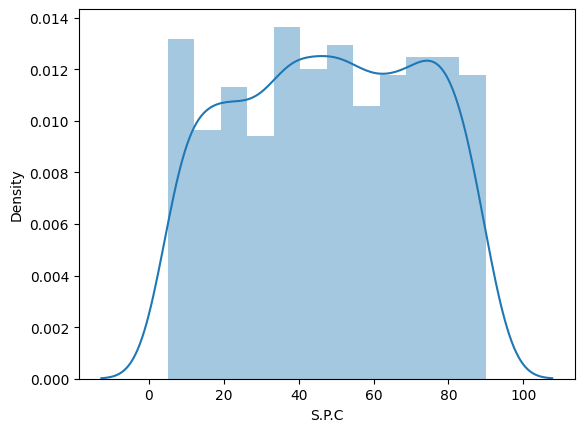

L.A.C


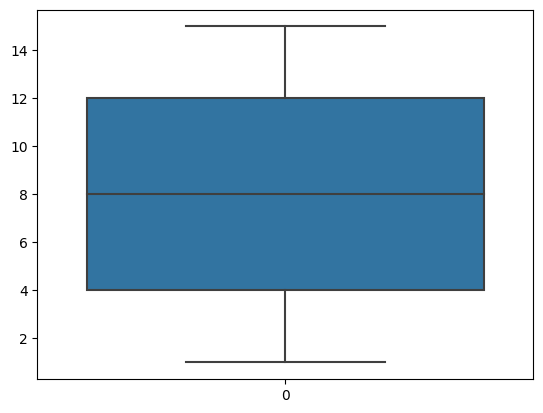

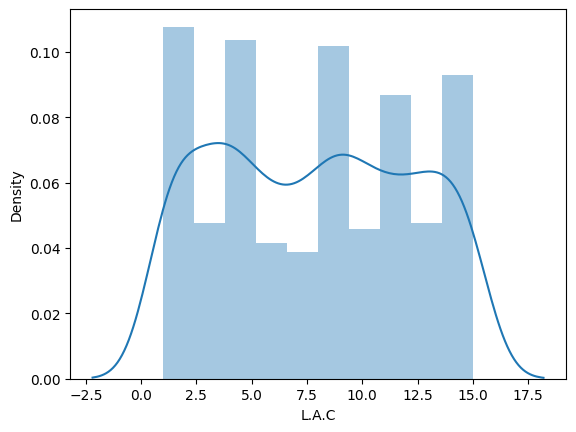

L.A.I


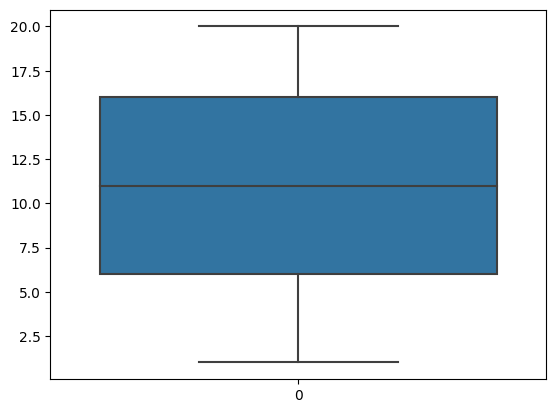

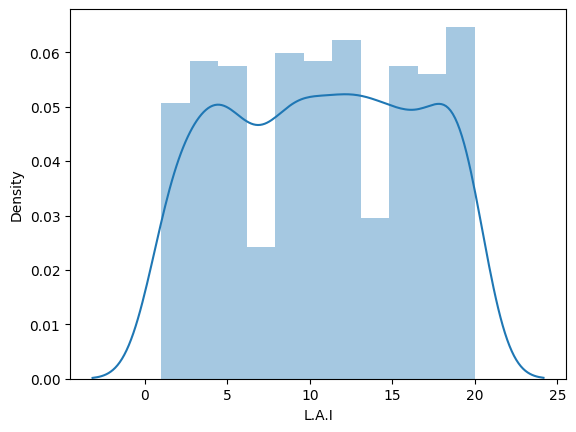

Q.A


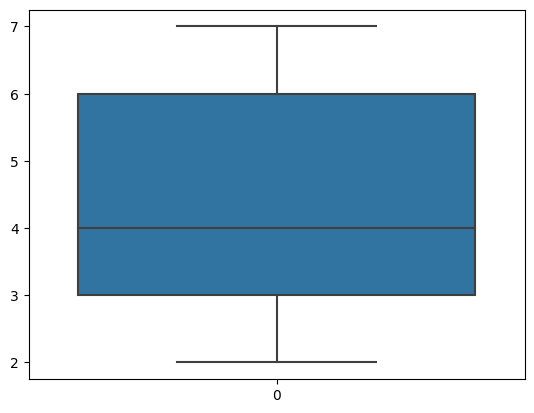

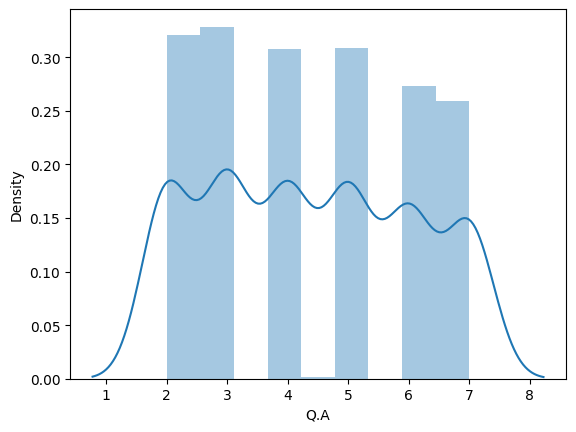

COMPLIANCE Ratio


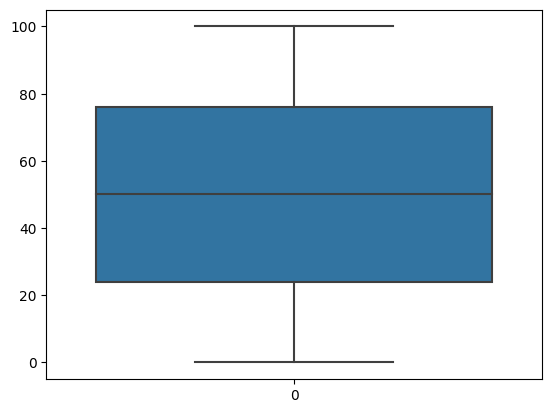

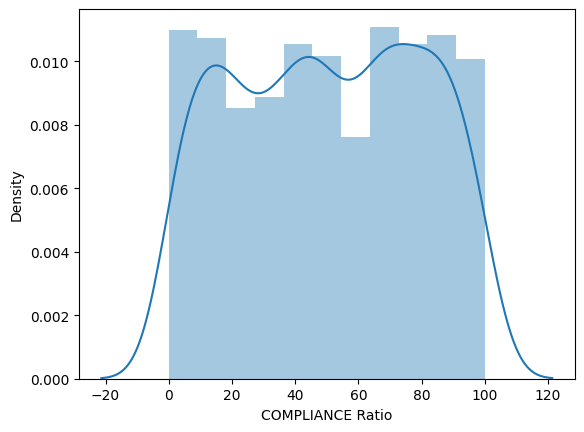

Interview duration


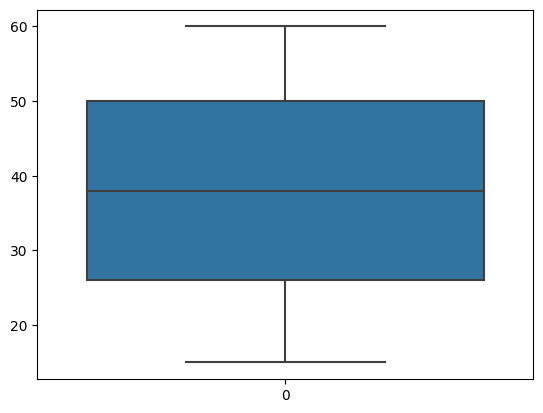

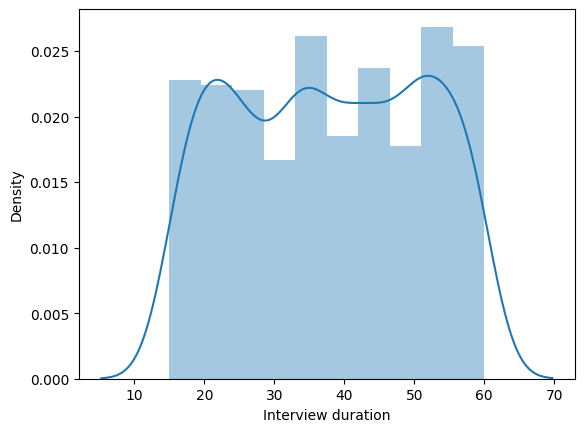

Profile
['Product Manager' 'QA Automation' 'HR' 'Developer' 'Account Manager'
 'Program Manager' 'Sales' 'Data Scientist' 'QA Manual' 'Marketing']
Number of unique values = 10


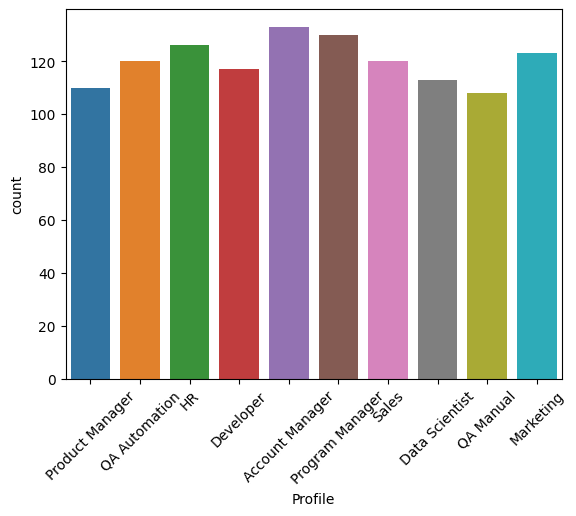

P.E.I
['Positive' 'Negative' 'Neutral']
Number of unique values = 3


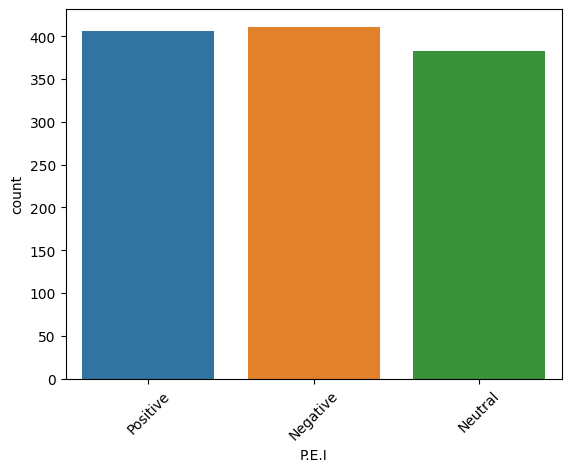

P.E.C
['Negative' 'Neutral' 'Positive' nan]
Number of unique values = 3


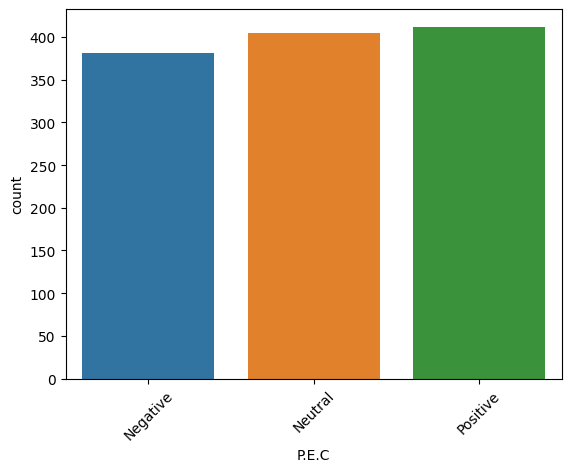

Interviewer Intro
['Yes' 'No']
Number of unique values = 2


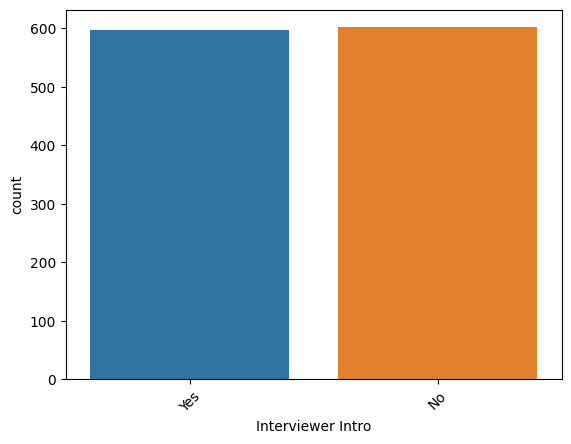

Candidate into
['Yes' 'No']
Number of unique values = 2


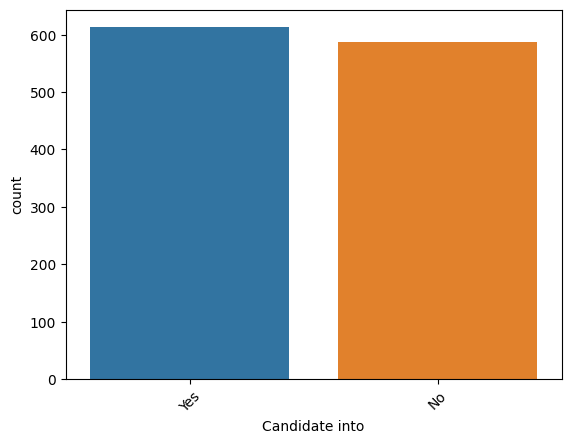

Opp to ask
['Yes' 'No']
Number of unique values = 2


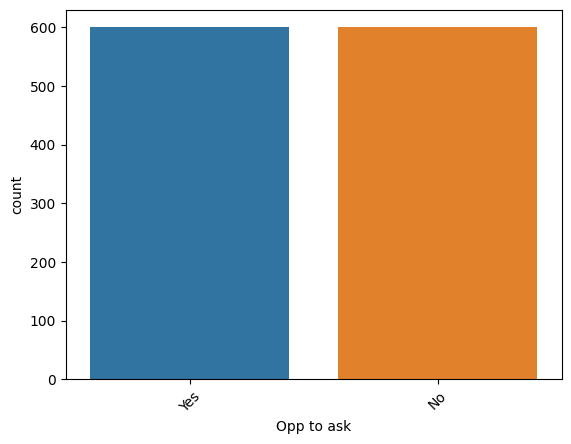

In [52]:
for i in num_test_data:
    print(i)
    sns.boxplot(test_data[i])
    plt.show()
    sns.distplot(test_data[i])
    plt.show()
for i in cat_test_data:
    print(i)
    print(test_data[i].unique())
    print('Number of unique values =', test_data[i].nunique())
    sns.countplot(data=test_data, x=i)  # Specify 'x' as the categorical variable.
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed.
    plt.show()

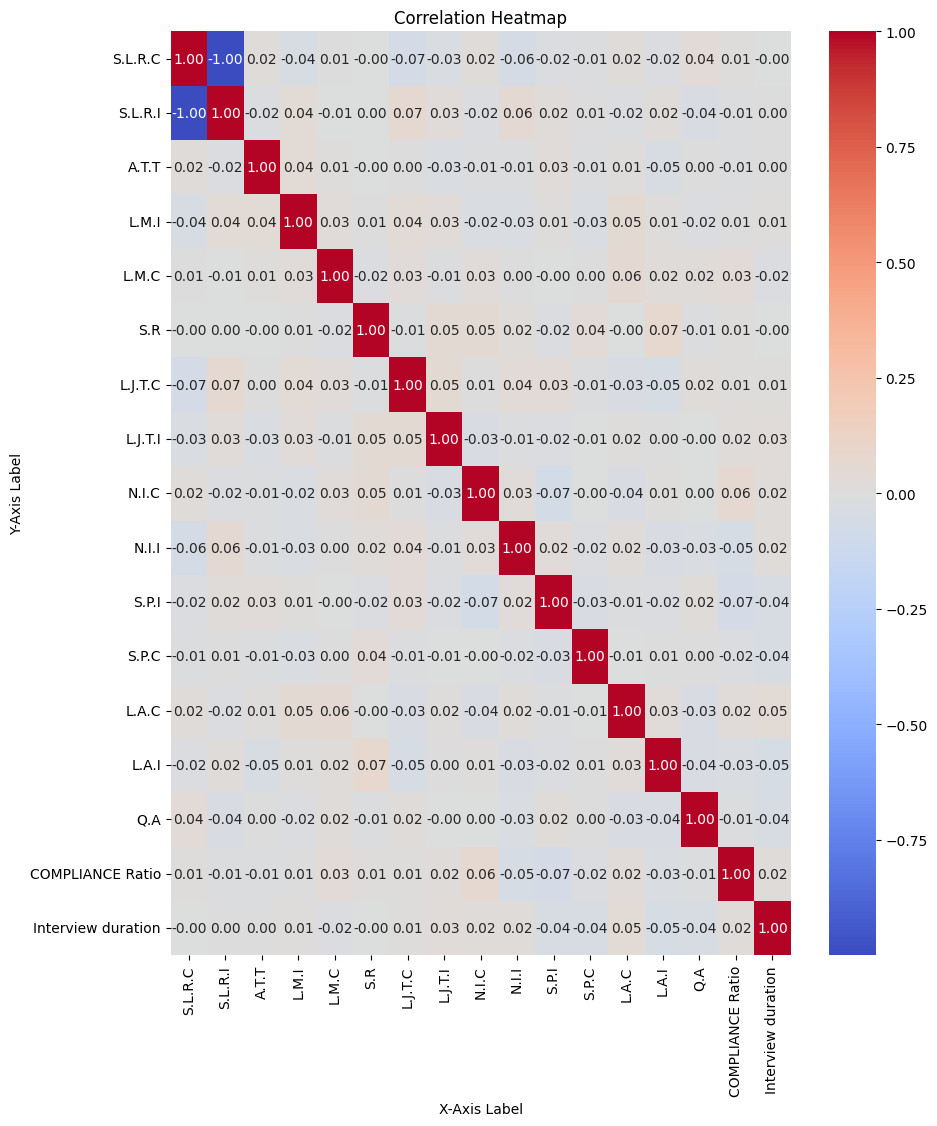

In [53]:
# Sample correlation matrix
correlation_matrix = test_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")  # 'annot' displays the correlation values, 'fmt' formats the annotation

# Add labels and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [54]:
test_data.drop('S.L.R.C',axis=1,inplace=True)

In [55]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Profile             1200 non-null   object 
 1   S.L.R.I             1200 non-null   float64
 2   A.T.T               1200 non-null   int64  
 3   L.M.I               1200 non-null   int64  
 4   L.M.C               1200 non-null   int64  
 5   S.R                 1200 non-null   int64  
 6   L.J.T.C             1200 non-null   float64
 7   L.J.T.I             1200 non-null   int64  
 8   N.I.C               1200 non-null   int64  
 9   N.I.I               1200 non-null   int64  
 10  S.P.I               1200 non-null   float64
 11  S.P.C               1200 non-null   int64  
 12  L.A.C               1200 non-null   int64  
 13  L.A.I               1199 non-null   float64
 14  Q.A                 1200 non-null   float64
 15  P.E.I               1200 non-null   object 
 16  P.E.C 

In [ ]:
# Define a dictionary for mapping similar values
mapping = {
    'Developer': 0,
    'Sales': 1,
    'Program Manager': 2,
    'Marketing':3,
    'QA Automation':4,
    'Account Manager': 5,
    'Data Scientist': 6,
    'Product Manager': 7,
    'QA Manual':8,
    'HR':9
}
test_data['Profile']=test_data['Profile'].replace(mapping)
# Define a dictionary for mapping similar values
mapping = {
    'Neutral': 0,
    'Positive': 1,
    'Negative': 2
}
test_data['P.E.I']=test_data['P.E.I'].replace(mapping)

# Define a dictionary for mapping similar values
mapping = {
    'Neutral': 0,
    'Positive': 1,
    'Negative': 2
}
test_data['P.E.C']=test_data['P.E.C'].replace(mapping)
# Define a dictionary for mapping similar values
mapping = {
    'Yes': 0,
    'No': 1
}
test_data['Interviewer Intro']=test_data['Interviewer Intro'].replace(mapping)
# Define a dictionary for mapping similar values
mapping = {
    'Yes': 0,
    'No': 1
}
test_data['Candidate into']=test_data['Candidate into'].replace(mapping)
# Define a dictionary for mapping similar values
mapping = {
    'Yes': 0,
    'No': 1
}
test_data['Opp to ask']=test_data['Opp to ask'].replace(mapping)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Profile             1200 non-null   int64  
 1   S.L.R.I             1200 non-null   float64
 2   A.T.T               1200 non-null   int64  
 3   L.M.I               1200 non-null   int64  
 4   L.M.C               1200 non-null   int64  
 5   S.R                 1200 non-null   int64  
 6   L.J.T.C             1200 non-null   float64
 7   L.J.T.I             1200 non-null   int64  
 8   N.I.C               1200 non-null   int64  
 9   N.I.I               1200 non-null   int64  
 10  S.P.I               1200 non-null   float64
 11  S.P.C               1200 non-null   int64  
 12  L.A.C               1200 non-null   int64  
 13  L.A.I               1200 non-null   float64
 14  Q.A                 1200 non-null   float64
 15  P.E.I               1200 non-null   int64  
 16  P.E.C 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(test_data)
test_data=pd.DataFrame(scaled,columns=X.columns)

In [ ]:
test_data.head(2)

,Profile,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,...,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,0.892087,1.508554,1.127133,-1.145448,-0.189748,-1.028935,-1.452800,-0.101677,-1.556654,-0.818868,...,-0.637418,1.445762,-0.218720,-0.028697,1.260701,-0.894777,0.843182,-1.003339,-0.978563,-1.0
1,0.892087,-0.917517,-0.556608,-0.972175,-1.056340,1.575385,0.312599,-0.295793,1.295473,0.119464,...,-1.547473,-0.300503,1.562709,-0.028697,-1.211262,1.661729,-1.028199,0.996672,-0.978563,-1.0


In [ ]:
pre=pd.Series(best_MLP.predict(test_data))

In [ ]:
pre

0           Consider
1       May Consider
2       May Consider
3       Not Consider
4       Not Consider
            ...     
1195    Not Consider
1196        Consider
1197    Not Consider
1198    May Consider
1199    May Consider
Length: 1200, dtype: object

In [ ]:
pre.unique()

array(['Consider', 'May Consider', 'Not Consider'], dtype=object)

In [ ]:
tmp_test_data = pd.read_csv(r"/content/drive/MyDrive/Hackthon Level2/test_IA_-_test.csv")

In [ ]:
tmp_test_data

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,...,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,702127796635,2.381365e+09,229,Product Manager,0.52,0.48,103,53,77,30,...,5,19.0,4.0,Positive,Negative,24.0,49,Yes,Yes,Yes
1,613490569071,8.428514e+08,194,Product Manager,0.87,0.13,54,57,57,68,...,1,9.0,7.0,Positive,Neutral,99.0,24,No,Yes,Yes
2,759998772623,7.681665e+09,266,QA Automation,0.60,0.40,50,117,93,36,...,7,15.0,3.0,Negative,Positive,16.0,16,Yes,No,Yes
3,391760082113,6.627808e+09,256,HR,0.52,0.48,102,114,66,31,...,10,4.0,6.0,Negative,Neutral,66.0,40,No,No,Yes
4,941599210196,1.148634e+09,267,HR,0.59,0.41,96,73,115,23,...,10,4.0,6.0,Positive,Positive,47.0,38,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,256033687434,1.299110e+09,193,Marketing,0.66,0.34,95,118,79,65,...,15,20.0,7.0,Positive,Negative,86.0,49,Yes,Yes,No
1196,627337316047,2.367087e+09,233,Data Scientist,0.66,0.34,42,47,107,57,...,8,18.0,2.0,Positive,Negative,32.0,32,No,Yes,No
1197,75547031851,4.401842e+09,214,HR,0.73,0.27,72,105,78,55,...,1,18.0,3.0,Negative,Negative,34.0,19,Yes,Yes,No
1198,173914777164,7.505289e+08,231,Developer,0.95,0.05,42,45,68,60,...,1,9.0,7.0,Positive,Negative,78.0,23,No,No,No


In [ ]:
tmp_test_data['Status'] = pre  #Interview Id Status

In [ ]:
tmp_test_data[['Interview Id','Status']]

,Interview Id,Status
0,702127796635,Consider
1,613490569071,May Consider
2,759998772623,May Consider
3,391760082113,Not Consider
4,941599210196,Not Consider
...,...,...
1195,256033687434,Not Consider
1196,627337316047,Consider
1197,75547031851,Not Consider
1198,173914777164,May Consider


In [ ]:
tmp_test_data[['Interview Id','Status']].to_csv("Final_submission3.csv",index=False)

In [ ]:
from google.colab import files
files.download("Final_submission3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>